<div style="border: 2px solid #1E3A8A; padding: 15px; border-radius: 10px; 
            background-color: #0F172A; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h1>📦 Imported Essential Libraries for Analysis</h1>
</div>

In [319]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter, MaxNLocator
from IPython.display import Markdown, display
from ydata_profiling import ProfileReport

In [320]:
# Download latest version
path = kagglehub.dataset_download("abhijitdahatonde/zomato-restaurants-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/zomato-restaurants-dataset


In [321]:
# Build the full file path to the CSV file inside the dataset folder
csv_path = f"{path}/zomato.csv"

# Read the CSV file into a pandas DataFrame
restaurant_df = pd.read_csv(csv_path)

# Show the first 5 rows of the dataset to check the data
display(restaurant_df.head(10))

# Display the shape of the dataset (number of rows, number of columns)
print(f'The shape of the dataset by number of rows and columns: {restaurant_df.shape}')

,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,0,0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,1,1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,2,2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,3,3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,4,4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur
5,5,5,'@99,"Takeaway, Delivery",3.4,37,200.0,No,No,"Mughlai, Biryani, Chinese, North Indian",Whitefield,Whitefield
6,6,6,'@Italy,Casual Dining,4.1,305,700.0,Yes,No,Italian,Banashankari,Kumaraswamy Layout
7,7,7,'@North Parontha Hut,"Takeaway, Delivery",2.8,40,300.0,No,No,North Indian,Indiranagar,Old Airport Road
8,8,8,1000 B.C,Quick Bites,3.2,49,300.0,Yes,No,"Arabian, Sandwich, Rolls, Burger","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
9,9,9,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,Casual Dining,3.7,41,450.0,No,No,"Biryani, North Indian","Byresandra,Tavarekere,Madiwala",BTM


The shape of the dataset by number of rows and columns: (7105, 12)


<div style="border: 2px solid #1E3A8A; padding: 15px; border-radius: 10px; 
            background-color: #0F172A; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h1>🔍 Data Inspection and Formatting</h1>
</div>

In [322]:
# Basic information about the dataset
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           7105 non-null   int64  
 1   Unnamed: 0             7105 non-null   int64  
 2   restaurant name        7105 non-null   object 
 3   restaurant type        7105 non-null   object 
 4   rate (out of 5)        7037 non-null   float64
 5   num of ratings         7105 non-null   int64  
 6   avg cost (two people)  7048 non-null   float64
 7   online_order           7105 non-null   object 
 8   table booking          7105 non-null   object 
 9   cuisines type          7105 non-null   object 
 10  area                   7105 non-null   object 
 11  local address          7105 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 666.2+ KB


In [323]:
# Summary of missing (NaN/Null) and zero values per column then sort by highest combined NaN/Null + Zeros
missing_summary = (
    restaurant_df.dtypes.to_frame(name="Type")
    .join(pd.DataFrame({
        "Missed values": restaurant_df.isna().sum(),
        "Percentage Missed": round(restaurant_df.isna().mean() * 100, 2),
        "Zeros": (restaurant_df == 0).sum(),
        "Percentage Zeros": round((restaurant_df == 0).mean() * 100, 2)}))
    .assign(**{"NaN/Null + Zeros": lambda df: df["Missed values"] + df["Zeros"]})
    .sort_values(by="NaN/Null + Zeros", ascending=False))

display(missing_summary)

,Type,Missed values,Percentage Missed,Zeros,Percentage Zeros,NaN/Null + Zeros
rate (out of 5),float64,68,0.96,0,0.00,68
avg cost (two people),float64,57,0.80,0,0.00,57
Unnamed: 0.1,int64,0,0.00,1,0.01,1
Unnamed: 0,int64,0,0.00,1,0.01,1
restaurant name,object,0,0.00,0,0.00,0
restaurant type,object,0,0.00,0,0.00,0
num of ratings,int64,0,0.00,0,0.00,0
online_order,object,0,0.00,0,0.00,0
table booking,object,0,0.00,0,0.00,0
cuisines type,object,0,0.00,0,0.00,0


In [324]:
# Show descriptive statistics (count, mean, std, min, quartiles, max) 
restaurant_df.describe(include="all")

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0.1,Unnamed: 0,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
count,7105.000000,7105.000000,7105,7105,7037.000000,7105.000000,7048.000000,7105,7105,7105,7105,7105
unique,NaN,NaN,7105,81,NaN,NaN,NaN,2,2,2175,30,90
top,NaN,NaN,#FeelTheROLL,Quick Bites,NaN,NaN,NaN,Yes,No,"North Indian, Chinese","Byresandra,Tavarekere,Madiwala",Whitefield
freq,NaN,NaN,1,2840,NaN,NaN,NaN,3727,6361,421,798,459
mean,3552.000000,3552.000000,NaN,NaN,3.514253,188.921042,540.286464,NaN,NaN,NaN,NaN,NaN
std,2051.181164,2051.181164,NaN,NaN,0.463249,592.171049,462.902305,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,1.800000,1.000000,40.000000,NaN,NaN,NaN,NaN,NaN
25%,1776.000000,1776.000000,NaN,NaN,3.200000,16.000000,300.000000,NaN,NaN,NaN,NaN,NaN
50%,3552.000000,3552.000000,NaN,NaN,3.500000,40.000000,400.000000,NaN,NaN,NaN,NaN,NaN
75%,5328.000000,5328.000000,NaN,NaN,3.800000,128.000000,600.000000,NaN,NaN,NaN,NaN,NaN


In [325]:
# Drop unnecessary columns
restaurant_df.drop(columns=['Unnamed: 0.1' , 'Unnamed: 0'], axis=1, inplace=True)
restaurant_df.head()

,restaurant name,restaurant type,rate (out of 5),num of ratings,avg cost (two people),online_order,table booking,cuisines type,area,local address
0,#FeelTheROLL,Quick Bites,3.4,7,200.0,No,No,Fast Food,Bellandur,Bellandur
1,#L-81 Cafe,Quick Bites,3.9,48,400.0,Yes,No,"Fast Food, Beverages","Byresandra,Tavarekere,Madiwala",HSR
2,#refuel,Cafe,3.7,37,400.0,Yes,No,"Cafe, Beverages",Bannerghatta Road,Bannerghatta Road
3,'@ Biryani Central,Casual Dining,2.7,135,550.0,Yes,No,"Biryani, Mughlai, Chinese",Marathahalli,Marathahalli
4,'@ The Bbq,Casual Dining,2.8,40,700.0,Yes,No,"BBQ, Continental, North Indian, Chinese, Bever...",Bellandur,Bellandur


* `.astype(str)` → Converts all values in the "restaurant name" column to strings to prevents errors if some entries are numbers, NaN, or other types.

* `.str.encode("utf-8", "ignore").str.decode("utf-8", "ignore")` → Re-encodes the text into UTF-8 and decodes it back to drops any invalid or unreadable characters (e.g. ÃÂ).
* `.str.replace(r"[^a-zA-Z0-9\s&,.()-]", "", regex=True)` →  Uses a regular expression ([^...]) to remove all characters that are not:
    * `a-zA-Z` → Letters
    * `0-9` → Digits
    * `\s` → Whitespace
    * `& , . ( ) -` → A few punctuation marks allowed
    * `""` → Replaces any character not in the list with an empty string, effectively removing it.
* `.str.strip()` → Removes any leading or trailing whitespace (spaces, tabs, newlines) from the beginning and end of the string.

In [326]:
import re

# Clean restaurant names
restaurant_df["restaurant name"] = (
    restaurant_df["restaurant name"]
    .astype(str)                                 
    .str.encode("utf-8", "ignore").str.decode("utf-8", "ignore")  
    .str.replace(r"[^a-zA-Z0-9\s&,.()-]", "", regex=True) 
    .str.strip())

# Preview cleaned names
restaurant_df["restaurant name"].head(20)

0                    FeelTheROLL
1                      L-81 Cafe
2                         refuel
3                Biryani Central
4                        The Bbq
5                             99
6                          Italy
7             North Parontha Hut
8                       1000 B.C
9                           100C
10    11 to 11 Express Biriyanis
11             1131 Bar  Kitchen
12     12th Main - Grand Mercure
13                 1441 Pizzeria
14                1522 - The Pub
15            154 Breakfast Club
16             1722 Urban Bistro
17                   18 Ice Cafe
18                          1947
19              1980s Games Cafe
Name: restaurant name, dtype: object

* `.str.strip()` → Removes any leading or trailing whitespace (spaces, tabs, newlines) from the beginning and end of the string.
* `.str.replace(r"\s+", "_", regex=True)` → Finds one or more whitespace characters (\s+) and replaces them with an underscore _.
* `.str.replace(r"[^\w_]", "", regex=True)` → Removes all characters except word characters (\w = letters, numbers, underscore) and underscores.
* `.str.lower()` → Convert everything to lowercase

In [327]:
# Standardize column names
restaurant_df.columns = (
    restaurant_df.columns
    .str.strip()  
    .str.replace(r"\s+", "_", regex=True)    
    .str.replace(r"[^\w_]", "", regex=True)
    .str.lower())

In [328]:
# Check column name and number of columns
print(restaurant_df.columns)
print(f'The number of columns: {len(restaurant_df.columns)}')

Index(['restaurant_name', 'restaurant_type', 'rate_out_of_5', 'num_of_ratings',
       'avg_cost_two_people', 'online_order', 'table_booking', 'cuisines_type',
       'area', 'local_address'],
      dtype='object')
The number of columns: 10


<div style="border: 2px solid #1E3A8A; padding: 15px; border-radius: 10px; 
            background-color: #0F172A; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h1>🧹 Data Cleaning</h1>
</div>

In [329]:
# Select columns with numerical data types (integers, floats) and store their names in a list
numerical_columns = restaurant_df.select_dtypes(include=[np.number]).columns.tolist()

# Select columns with object (string/text) or category data types and store their names in a list
categorical_columns = restaurant_df.select_dtypes(include=["object", "category"]).columns.tolist()

# Preview the columns
print(f"Numeric data columns: {numerical_columns}")
print(f"Categorical data columns: {categorical_columns}")

Numeric data columns: ['rate_out_of_5', 'num_of_ratings', 'avg_cost_two_people']
Categorical data columns: ['restaurant_name', 'restaurant_type', 'online_order', 'table_booking', 'cuisines_type', 'area', 'local_address']


In [330]:
# Re-inspect the information about the dataset
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   restaurant_name      7105 non-null   object 
 1   restaurant_type      7105 non-null   object 
 2   rate_out_of_5        7037 non-null   float64
 3   num_of_ratings       7105 non-null   int64  
 4   avg_cost_two_people  7048 non-null   float64
 5   online_order         7105 non-null   object 
 6   table_booking        7105 non-null   object 
 7   cuisines_type        7105 non-null   object 
 8   area                 7105 non-null   object 
 9   local_address        7105 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 555.2+ KB


<div style="border: 2px solid #1E3A8A; padding: 12px; border-radius: 10px; 
            background-color: #2C3E50; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h2>🗂️ Ensure Proper Datatype Assignment</h2>
</div>

In [331]:
# 🔧 Ensure numeric columns use the correct dtype (float64 for calculations)
restaurant_df[numerical_columns] = restaurant_df[numerical_columns].astype("float64")

# 🎯 Convert object columns to categorical dtype, except for 'restaurant_name' and 'local_address' which should remain as text.
exclude_cols = ["restaurant_name", "local_address"]
# Identify object columns eligible for conversion
categorical_columns = restaurant_df.select_dtypes(include="object").columns.difference(exclude_cols)
# Apply category dtype conversion
restaurant_df[categorical_columns] = restaurant_df[categorical_columns].astype("category")

In [332]:
# Re-inspect the information about the dataset
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7105 entries, 0 to 7104
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   restaurant_name      7105 non-null   object  
 1   restaurant_type      7105 non-null   category
 2   rate_out_of_5        7037 non-null   float64 
 3   num_of_ratings       7105 non-null   float64 
 4   avg_cost_two_people  7048 non-null   float64 
 5   online_order         7105 non-null   category
 6   table_booking        7105 non-null   category
 7   cuisines_type        7105 non-null   category
 8   area                 7105 non-null   category
 9   local_address        7105 non-null   object  
dtypes: category(5), float64(3), object(2)
memory usage: 405.0+ KB


In [333]:
# If numerical columns exist, calculate and print the descriptive statistics 
if numerical_columns:
    # .T (transpose) is used to display the statistics as rows and column names as columns for better readability.
    display("\nDescriptive stats (numeric):\n", restaurant_df[numerical_columns].describe().T)

'\nDescriptive stats (numeric):\n'

,count,mean,std,min,25%,50%,75%,max
rate_out_of_5,7037.0,3.514253,0.463249,1.8,3.2,3.5,3.8,4.9
num_of_ratings,7105.0,188.921042,592.171049,1.0,16.0,40.0,128.0,16345.0
avg_cost_two_people,7048.0,540.286464,462.902305,40.0,300.0,400.0,600.0,6000.0


<div style="border: 2px solid #1E3A8A; padding: 12px; border-radius: 10px; 
            background-color: #2C3E50; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h2>⚠️ Handling Missing and Invalid Values</h2>
</div>

In [334]:
def preview_problematic_rows(df, columns, n=10):
    """
    Preview rows where selected columns contain NaN or 0 values.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to check
        columns (list): List of column names to inspect
        n (int): Number of rows to preview (default = 10)
    """
    # Combine conditions across all chosen columns
    condition = False # Starts with a False condition (no rows selected yet) → Will update this as a function loop over columns.
    for col in columns:
        condition |= df[col].isna() | (df[col] == 0)
    
    # Filter problematic rows
    problematic_rows = df[condition]
    
    # Show first n rows
    return problematic_rows.head(n)

# Showing missing values for rating column
preview_problematic_rows(restaurant_df, ["rate_out_of_5"], n=10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
105,Aahar Cafe,Quick Bites,NaN,40.0,100.0,No,No,South Indian,Basavanagudi,Basavanagudi
173,Aisha Tharavad,Quick Bites,NaN,40.0,400.0,No,No,"South Indian, Kerala",Koramangala 6th Block,Ejipura
228,Al-Hyatt,Quick Bites,NaN,40.0,300.0,No,No,"Biryani, Chinese",Koramangala 6th Block,Ejipura
309,Ammas Special,Quick Bites,NaN,40.0,400.0,No,No,South Indian,Koramangala 6th Block,Koramangala 1st Block
310,Ammayi Thakkaram,Quick Bites,NaN,40.0,400.0,No,No,"Kerala, South Indian",Koramangala 6th Block,BTM
448,Arya Vysya Refreshment,Quick Bites,NaN,40.0,100.0,No,No,South Indian,Basavanagudi,Basavanagudi
504,Ayush Reddy Tiffins & Fast Food Center,Quick Bites,NaN,40.0,300.0,No,No,"South Indian, Fast Food, Chinese",Koramangala 6th Block,BTM
716,Bhaiyajees,"Takeaway, Delivery",NaN,40.0,300.0,No,No,"North Indian, South Indian",Koramangala 6th Block,Koramangala 8th Block
872,Blends Juice Cafe,Quick Bites,NaN,40.0,200.0,No,No,"Beverages, Desserts",Koramangala 6th Block,BTM
942,Brahmin Tiffins & Coffee,Quick Bites,NaN,40.0,100.0,No,No,"South Indian, Beverages",Basavanagudi,Basavanagudi


In [335]:
# Showing missing values for avg_cost column
preview_problematic_rows(restaurant_df, ["avg_cost_two_people"], n=10)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
125,ABC Grand,Casual Dining,3.5,54.0,NaN,No,No,"Andhra, Chinese, North Indian",Old Airport Road,Indiranagar
201,Al Karim,Casual Dining,3.7,90.0,NaN,No,No,"Mughlai, North Indian, Biryani, Chinese",Kammanahalli,Kalyan Nagar
337,Anand Vihar,Quick Bites,2.5,58.0,NaN,No,No,"North Indian, Chinese",Frazer Town,RT Nagar
362,Andhra Spices,Quick Bites,3.2,4.0,NaN,No,No,"Andhra, Chinese, South Indian",Whitefield,Brookefield
549,Bakers77,"Bakery, Quick Bites",3.8,35.0,NaN,No,No,"Bakery, Fast Food",Rajajinagar,Basaveshwara Nagar
864,Black Deer,"Takeaway, Delivery",4.4,149.0,NaN,No,No,"Beverages, Ice Cream, Desserts","Byresandra,Tavarekere,Madiwala",Koramangala 5th Block
922,Boozers Bar & Kitchen,"Bar, Casual Dining",4.3,700.0,NaN,No,No,"Continental, Burger, Italian, Pizza, North Ind...",Indiranagar,Indiranagar
1074,Cafe Beirut,Quick Bites,3.7,41.0,NaN,No,No,Arabian,Kammanahalli,Kammanahalli
1149,Cafe Talkhouse,Quick Bites,3.8,23.0,NaN,No,No,North Indian,HSR,HSR
1156,Cafe Xtasi,"Takeaway, Delivery",2.8,40.0,NaN,No,No,Pizza,Electronic City,Electronic City


* `groupby(["restaurant_type", "area"])` → groups restaurants by both type (e.g., Quick Bites, Cafe) and area (e.g., BTM, Indiranagar).
* `.transform(lambda x: x.fillna(x.mean()))` →  Within each group, if a restaurant’s rating is missing (NaN), it gets replaced by the mean rating of that group.
* `fillna(restaurant_df["rate_out_of_5"].mean()` → Replaces any remaining NaNs with the global mean of the corresponding column.

In [336]:
# 1️⃣ Fill Missing Ratings (`rate_out_of_5`)
# Approach:
# - Group restaurants by [restaurant_type, area].
# - Fill NaN values with the group mean rating (since ratings are on a fixed 0–5 scale).
# - If an entire group has missing values, replace them with the global mean rating.

restaurant_df["rate_out_of_5"] = (
    restaurant_df.groupby(["restaurant_type", "area"])["rate_out_of_5"]
    .transform(lambda x: x.fillna(x.mean())))

# Fallback: fill remaining NaN with global mean
restaurant_df["rate_out_of_5"].fillna(restaurant_df["rate_out_of_5"].mean(), inplace=True)


# 2️⃣ Fill Missing Average Cost (`avg_cost_two_people`)
# Approach:
# - Group restaurants by [restaurant_type, area].
# - Fill NaN values with the group median cost (median is more robust against skewed cost data).
# - If an entire group has missing values, replace them with the global median cost.

restaurant_df["avg_cost_two_people"] = (
    restaurant_df.groupby(["restaurant_type", "area"])["avg_cost_two_people"]
    .transform(lambda x: x.fillna(x.median())))

# Fallback: fill remaining NaN with global median
restaurant_df["avg_cost_two_people"].fillna(restaurant_df["avg_cost_two_people"].median(), inplace=True)


# Verify that no missing values remain in the key columns.
print(restaurant_df[["rate_out_of_5", "avg_cost_two_people"]].isna().sum())

/tmp/ipykernel_36/2542868475.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  restaurant_df.groupby(["restaurant_type", "area"])["rate_out_of_5"]
/tmp/ipykernel_36/2542868475.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  restaurant_df["rate_out_of_5"].fillna(restaurant_df["rate_out_of_5"].mean(), inplace=True)
/tmp/ipykernel_36/

rate_out_of_5          0
avg_cost_two_people    0
dtype: int64


/tmp/ipykernel_36/2542868475.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  restaurant_df["avg_cost_two_people"].fillna(restaurant_df["avg_cost_two_people"].median(), inplace=True)


<div style="border: 2px solid #1E3A8A; padding: 12px; border-radius: 10px; 
            background-color: #2C3E50; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h2>🗑️ Remove Duplicate Values</h2>
</div>

##### **Check and remove any duplicate values in the dataset**
* `restaurant_df.duplicated()` → returns a boolean mask (True for duplicates).
* `keep=False` → marks all duplicates as True (instead of keeping the first occurrence).
* `drop_duplicates` → removes duplicate rows.
* `subset=["restaurant_name", "area"]` → only considers these two columns when checking duplicates.
* `keep="first"` → keeps the first occurrence, drops the rest.

**Optional:** `restaurant_df.duplicated(subset=["restaurant_name"])` → checks duplicates only by specific columns (e.g., restaurant name).


In [337]:
# Show all duplicates values
duplicates_all = restaurant_df[restaurant_df.duplicated(keep=False)]
display(duplicates_all)

,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
1053,Caf Felix,"Casual Dining, Cafe",4.4,721.0,1700.0,Yes,Yes,"American, Cafe, Continental",Lavelle Road,MG Road
1054,Caf MH-28,Cafe,3.4,9.0,300.0,Yes,No,Cafe,Lavelle Road,Shivajinagar
1058,Caf Felix,"Casual Dining, Cafe",4.4,721.0,1700.0,Yes,Yes,"American, Cafe, Continental",Lavelle Road,MG Road
1059,Caf MH-28,Cafe,3.4,9.0,300.0,Yes,No,Cafe,Lavelle Road,Shivajinagar
3557,Le Chri,Delivery,3.8,33.0,350.0,No,No,"Bakery, Desserts",Lavelle Road,Shanti Nagar
3558,Le Chri,Delivery,3.8,33.0,350.0,No,No,"Bakery, Desserts",Lavelle Road,Shanti Nagar
6923,WAFL Caf,"Dessert Parlor, Quick Bites",3.9,87.0,400.0,Yes,No,"Desserts, Beverages, American",Lavelle Road,Residency Road
6924,WAFL Caf,"Dessert Parlor, Quick Bites",3.9,87.0,400.0,Yes,No,"Desserts, Beverages, American",Lavelle Road,Residency Road
7030,Yauatcha Ptisserie,Dessert Parlor,3.9,58.0,600.0,Yes,No,Desserts,Lavelle Road,MG Road
7031,Yauatcha Ptisserie,Dessert Parlor,3.9,58.0,600.0,Yes,No,Desserts,Lavelle Road,MG Road


In [338]:
# Remove duplicates based on restaurant_name + area, keeping the first occurrence
restaurant_df = restaurant_df.drop_duplicates(subset=["restaurant_name", "area"], keep="first")

# Confirm removal
print(f"Remaining rows after removing duplicates: {restaurant_df.shape[0]}")

Remaining rows after removing duplicates: 7099


<div style="border: 2px solid #1E3A8A; padding: 12px; border-radius: 10px; 
            background-color: #2C3E50; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h2>🍽 Handling Multi-Label Categories in  <code>restaurant_type</code></h2>
</div>

##### 🔎 **The Challenge**
Some restaurants belong to **multiple categories** (e.g., *"Casual Dining, Cafe"*), making analysis tricky.

---

##### 🎯 **Possible Approaches**
1. **Explode into multiple rows** → best for EDA and reporting.  
2. **One-hot encoding** → best for machine learning models.

In [339]:
# Split restaurant_type into separate rows to prevent multiple categories in one cell, e.g.: "Bar, Casual Dining"
restaurant_df = (
    restaurant_df.assign(restaurant_type=restaurant_df["restaurant_type"].str.split(",\s*"))
    .explode("restaurant_type")
    .reset_index(drop=True))

# Clean spaces
restaurant_df["restaurant_type"] = restaurant_df["restaurant_type"].str.strip()

# Count restaurants by type
restaurant_type_counts = restaurant_df["restaurant_type"].value_counts()

print(type_counts.head(10))

restaurant_type
Quick Bites       2999
Casual Dining     1927
Delivery           646
Cafe               501
Takeaway           307
Dessert Parlor     296
Bar                279
Bakery             216
Beverage Shop      175
Food Court          96
Name: count, dtype: int64


In [340]:
# Re-check information about the dataset
restaurant_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7957 entries, 0 to 7956
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   restaurant_name      7957 non-null   object  
 1   restaurant_type      7957 non-null   object  
 2   rate_out_of_5        7957 non-null   float64 
 3   num_of_ratings       7957 non-null   float64 
 4   avg_cost_two_people  7957 non-null   float64 
 5   online_order         7957 non-null   category
 6   table_booking        7957 non-null   category
 7   cuisines_type        7957 non-null   category
 8   area                 7957 non-null   category
 9   local_address        7957 non-null   object  
dtypes: category(4), float64(3), object(3)
memory usage: 495.0+ KB


In [341]:
# Convert restaurant_type back to categorical type
restaurant_df["restaurant_type"] = restaurant_df["restaurant_type"].astype("category")

# Verify
print(restaurant_df["restaurant_type"].dtype)
print(restaurant_df["restaurant_type"].cat.categories)  # .cat.categories returns the unique set of category labels in that column.

category
Index(['Bakery', 'Bar', 'Beverage Shop', 'Bhojanalya', 'Cafe', 'Casual Dining',
       'Club', 'Confectionery', 'Delivery', 'Dessert Parlor', 'Dhaba',
       'Fine Dining', 'Food Court', 'Food Truck', 'Irani Cafee', 'Kiosk',
       'Lounge', 'Meat Shop', 'Mess', 'Microbrewery', 'Pub', 'Quick Bites',
       'Sweet Shop', 'Takeaway'],
      dtype='object')


<div style="border: 2px solid #1E3A8A; padding: 12px; border-radius: 10px; 
            background-color: #2C3E50; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h2>🍴 Handling Multi-Label Categories in <code>cuisines_type</code></h2>
</div>

In [342]:
# Split cuisines_type into separate rows to prevent multiple categories in one cell, e.g.: "Chinese, North Indian"
restaurant_df = (
    restaurant_df.assign(cuisines_type=restaurant_df["cuisines_type"].str.split(r",\s*"))
    .explode("cuisines_type")
    .reset_index(drop=True)
)

# Clean spaces
restaurant_df["cuisines_type"] = restaurant_df["cuisines_type"].str.strip()

# Count restaurants by cuisine type
cuisine_type_counts = restaurant_df["cuisines_type"].value_counts()

print(cuisine_type_counts.head(10))

cuisines_type
North Indian    3593
Chinese         2657
South Indian    1549
Fast Food       1192
Biryani          995
Continental      954
Desserts         667
Cafe             617
Beverages        614
Italian          473
Name: count, dtype: int64


<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background-color: #431407; color: #f1f1f1; 
            text-align: center; width: 98.2%; margin: 20px auto;">
<h1>📈 Exploratory Data Analysis (EDA)</h1>
</div>

In [343]:
# Generate data structure report with dataset and variable descriptions
report = ProfileReport(
    restaurant_df,
    # Important Parameters:
    ## title: The title of the report.
    ## explorative: If True, the report will be generated in explorative mode. This mode is more computationally expensive but provides more insights.
    ## correlations: you can specify the correlation methods to be used for the analysis. for example, correlations={"pearson", "spearman", "kendall", "phi_k"}.
    ## minimal: If True, only the essential information will be displayed in the report.
    ## type_schema: A dictionary specifying the data types of the columns. The keys are column names, and the values are the corresponding data types.

    title="<h5><b>Zomato's Restaurants Data Structure Report</b></h5>",
    dataset={
        "description": "This report provides a profiling overview of the Zomato restaurants dataset, "
                       "covering restaurant attributes, ratings, costs, and location details.",
        "author": "Daniel (Viet) Nguyen",
        "copyright_holder": "Daniel (Viet) Nguyen",
        "copyright_year": 2025,
        "url": "https://github.com/Danny-NG-9999?tab=repositories/"},
    variables={
        "descriptions": {
            "restaurant_name": "Name of the restaurant.",
            "restaurant_type": "Type/category of restaurant (e.g., Quick Bites, Casual Dining).",
            "rate_out_of_5": "Average customer rating on a scale of 0–5.",
            "num_of_ratings": "Number of customers who rated the restaurant.",
            "avg_cost_two_people": "Average dining cost for two people in local currency.",
            "online_order": "Whether the restaurant accepts online orders (Yes/No).",
            "table_booking": "Whether the restaurant provides table booking (Yes/No).",
            "cuisines_type": "Cuisines offered (e.g., Indian, Chinese, Italian).",
            "area": "Geographic area or locality of the restaurant.",
            "local_address": "Specific local address of the restaurant."},
        "type_schema": {
            "restaurant_name": "text",
            "restaurant_type": "categorical",
            "rate_out_of_5": "numeric",
            "num_of_ratings": "numeric",
            "avg_cost_two_people": "numeric",
            "online_order": "boolean",
            "table_booking": "boolean",
            "cuisines_type": "categorical",
            "area": "categorical",
            "local_address": "text"}
    },
    explorative=True,
    minimal=False)

# Save report as interactive HTML
report.to_file("Zomato's Restaurants Data Structure Report.html")

# Display in Jupyter Notebook
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 24.46it/s][A


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background: linear-gradient(135deg, #d6ccc2, #b08968, #7f5539); 
            color: #f1f1f1; text-align: center; 
            width: 98.2%; margin: 20px auto;">
<h2> Top 15 Restaurant Types: Popularity vs Quality with Rating Brackets </h2>
</div>

* `restaurant_df.groupby("restaurant_type", as_index=False)` → Groups the dataset by the column restaurant_type, `as_index=False` ensures that restaurant_type stays a regular column in the result, not an index.

* `.agg(Restaurants=("restaurant_name", "nunique"), AvgRating=("rate_out_of_5", "mean"))` → .agg() lets us compute multiple summary statistics in one go.
    * `Restaurants=("restaurant_name", "nunique")` → counts the number of unique restaurant names in each type.
    * `Restaurants=("restaurant_name", "count")` → Counts every record of a restaurant under each type.
    * `AvgRating=("rate_out_of_5", "mean")` → computes the average rating across all restaurants of that type. This gives us quality.

In [344]:
# Aggregate by restaurant type (count rows to match .value_counts)
aggregate_restaurant_type = (restaurant_df
    .groupby("restaurant_type", as_index=False)
    .agg(**{
        "# of Restaurants": ("restaurant_name", "count"),
        "AvgRating": ("rate_out_of_5", "mean")}))

# Round average rating for cleaner display
aggregate_restaurant_type["AvgRating"] = aggregate_restaurant_type["AvgRating"].round(2)

# Sort by number of restaurants (descending order)
aggregate_restaurant_type = aggregate_restaurant_type.sort_values(
    by="# of Restaurants", ascending=False
).reset_index(drop=True)

# Cross-check with .value_counts()
value_counts_check = restaurant_df["restaurant_type"].value_counts().reset_index()
value_counts_check.columns = ["restaurant_type", "ValueCounts"]

# Merge both for comparison
comparison = aggregate_restaurant_type.merge(value_counts_check, on="restaurant_type")

from IPython.display import Markdown, display

# Display result
display(Markdown("**Aggregated results (Top 15):**"))
display(aggregate_restaurant_type.head(15))

display(Markdown("**🔎 Cross-check (Aggregated count vs value_counts()):**"))
display(comparison.head(15))

/tmp/ipykernel_36/3627632627.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("restaurant_type", as_index=False)


**Aggregated results (Top 15):**

,restaurant_type,# of Restaurants,AvgRating
0,Quick Bites,6431,3.41
1,Casual Dining,5729,3.67
2,Cafe,1516,3.80
3,Delivery,1428,3.34
4,Bar,830,3.89
5,Takeaway,693,3.29
6,Dessert Parlor,570,3.64
7,Bakery,420,3.56
8,Beverage Shop,360,3.47
9,Pub,296,4.02


**🔎 Cross-check (Aggregated count vs value_counts()):**

,restaurant_type,# of Restaurants,AvgRating,ValueCounts
0,Quick Bites,6431,3.41,6431
1,Casual Dining,5729,3.67,5729
2,Cafe,1516,3.80,1516
3,Delivery,1428,3.34,1428
4,Bar,830,3.89,830
5,Takeaway,693,3.29,693
6,Dessert Parlor,570,3.64,570
7,Bakery,420,3.56,420
8,Beverage Shop,360,3.47,360
9,Pub,296,4.02,296


In [345]:
# Select the Top 15 Types by Popularity
top15_restaurant_types = aggregate_restaurant_type.sort_values("# of Restaurants", ascending=False).head(15).reset_index(drop=True)

# Display result
display(Markdown("**Top 15 Restaurant Types (by count):**"))
display(top15_restaurant_types)

**Top 15 Restaurant Types (by count):**

,restaurant_type,# of Restaurants,AvgRating
0,Quick Bites,6431,3.41
1,Casual Dining,5729,3.67
2,Cafe,1516,3.80
3,Delivery,1428,3.34
4,Bar,830,3.89
5,Takeaway,693,3.29
6,Dessert Parlor,570,3.64
7,Bakery,420,3.56
8,Beverage Shop,360,3.47
9,Pub,296,4.02


* `rating_bins` defines cut-off points for binning ratings.
  * The bins are [0,1), [1,2), [2,3), [3,4), [4,5)
  * So any rating between 0 and 1 goes into the first bin, between 1 and 2 goes into the second, etc.
* `rating_labels` are the names we’ll assign to each bin. For example, ratings between 3 and 4 will be labeled "3-4".

In [346]:
# Define discrete rating brackets for categorization
rating_bins = [0, 1, 2, 3, 4, 5]
rating_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]

top15_restaurant_types["RatingBracket"] = pd.cut(
    top15_restaurant_types["AvgRating"], bins=rating_bins,
    labels=rating_labels, include_lowest=True)

# Display result
display(Markdown("**Top 15 Restaurant Types with Rating Brackets:**"))
display(top15_restaurant_types[["restaurant_type", "# of Restaurants", "AvgRating", "RatingBracket"]])

**Top 15 Restaurant Types with Rating Brackets:**

,restaurant_type,# of Restaurants,AvgRating,RatingBracket
0,Quick Bites,6431,3.41,3-4
1,Casual Dining,5729,3.67,3-4
2,Cafe,1516,3.80,3-4
3,Delivery,1428,3.34,3-4
4,Bar,830,3.89,3-4
5,Takeaway,693,3.29,3-4
6,Dessert Parlor,570,3.64,3-4
7,Bakery,420,3.56,3-4
8,Beverage Shop,360,3.47,3-4
9,Pub,296,4.02,4-5


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


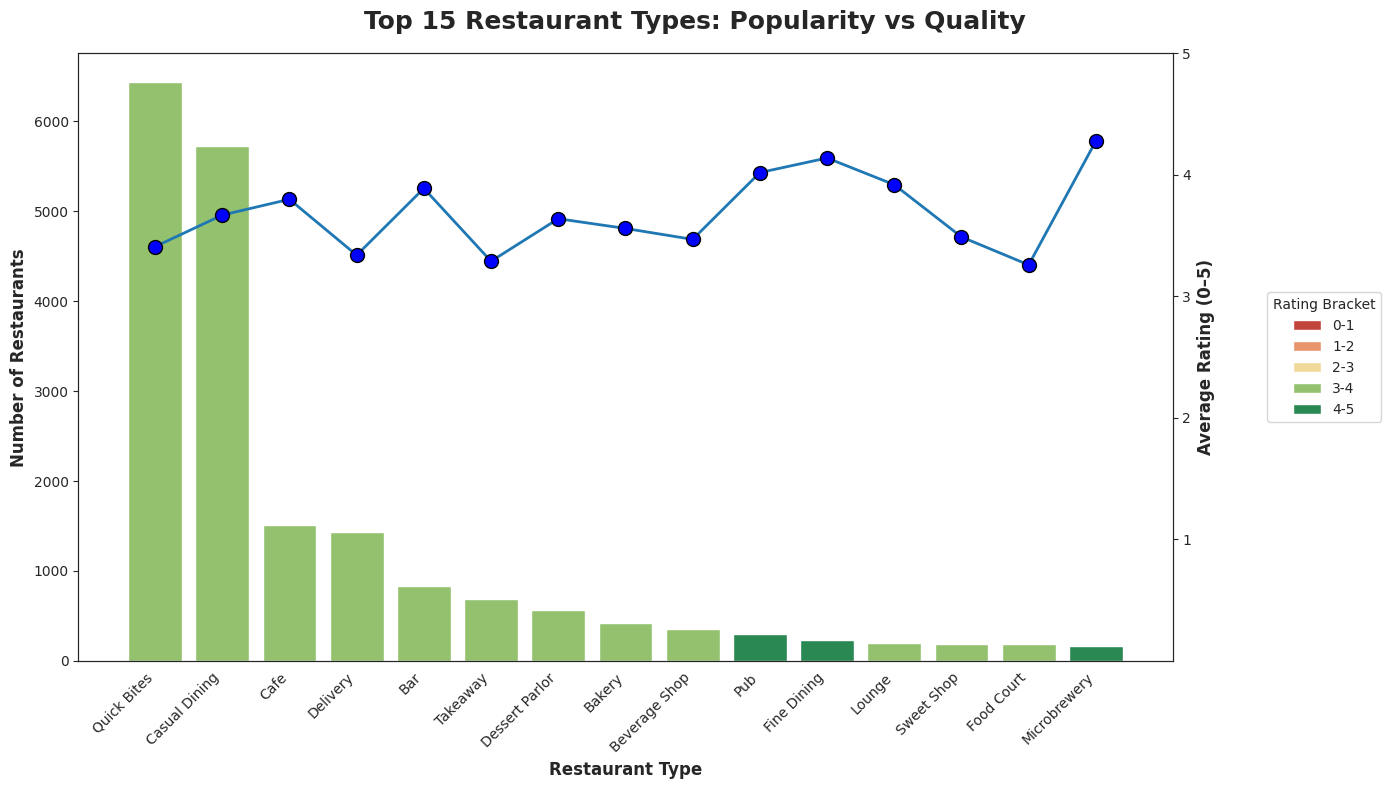

In [347]:
# Step 4: Visualize Top 15 Restaurant Types (Popularity vs Quality)
sns.set_style("white")
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define colors for rating brackets
rating_colors = ["#d73027", "#fc8d59", "#fee08b", "#91cf60", "#1a9850"]

# Ensure consistent order
order = top15_restaurant_types["restaurant_type"]

# Popularity as bars (colored by rating bracket)
sns.barplot(
    data=top15_restaurant_types,
    x="restaurant_type", y="# of Restaurants",
    hue="RatingBracket", palette=rating_colors,
    dodge=False, ax=ax1, order=order)

# Quality as dots on secondary axis
ax2 = ax1.twinx()
ax2.plot(
    order, top15_restaurant_types.set_index("restaurant_type").loc[order, "AvgRating"],
    marker="o", markersize=10,
    markeredgecolor="black", markerfacecolor="blue",
    linewidth=2, label="Avg Rating")

# Labels & formatting
ax1.set_xlabel("Restaurant Type", fontsize=12, fontweight="bold")
ax1.set_ylabel("Number of Restaurants", fontsize=12, fontweight="bold")
ax2.set_ylabel("Average Rating (0–5)", fontsize=12, fontweight="bold")
ax2.set_ylim(0, 5)
ax2.set_yticks([1, 2, 3, 4, 5])

# Rotate x-axis labels
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha="right")

# Remove gridlines
ax1.grid(False)
ax2.grid(False)

# Centered title (relative to the figure, not the axis)
plt.suptitle(
    "Top 15 Restaurant Types: Popularity vs Quality",
    fontsize=18, fontweight="bold", y=0.98, x=0.5, ha="center")

# Legend — central right but closer to the plot
ax1.legend(
    title="Rating Bracket",
    bbox_to_anchor=(1.08, 0.5),  # move closer to the chart
    loc="center left")

# Add caption about source
# plt.figtext(0.5, -0.02,"Source: Data collected from Zomato as of 2023", ha="center", fontsize=10, style="italic", color="gray")

plt.tight_layout()
plt.show()


In [348]:
# Step 5: Insights from Top 15 Restaurant Types
insights = []

# Most popular type (by count)
most_popular = top15_restaurant_types.iloc[0]
insights.append(f"🍽 The most common restaurant type is **{most_popular['restaurant_type']}**, "
                f"with **{most_popular['# of Restaurants']} restaurants** "
                f"and an average rating of **{most_popular['AvgRating']}**.")

# Highest rated type among top 15
highest_rated = top15_restaurant_types.loc[top15_restaurant_types['AvgRating'].idxmax()]
insights.append(f"⭐ The highest rated type in the Top 15 is **{highest_rated['restaurant_type']}**, "
                f"with an average rating of **{highest_rated['AvgRating']}** "
                f"across **{highest_rated['# of Restaurants']} restaurants**.")

# Lowest rated type among top 15
lowest_rated = top15_restaurant_types.loc[top15_restaurant_types['AvgRating'].idxmin()]
insights.append(f"⚠️ The lowest rated type in the Top 15 is **{lowest_rated['restaurant_type']}**, "
                f"with an average rating of only **{lowest_rated['AvgRating']}** "
                f"despite having **{lowest_rated['# of Restaurants']} restaurants**.")

# Identify growth opportunity: high rating but lower count
high_quality_niche = (top15_restaurant_types[top15_restaurant_types['# of Restaurants'] < 500]
                      .sort_values('AvgRating', ascending=False)
                      .head(1))
if not high_quality_niche.empty:
    row = high_quality_niche.iloc[0]
    insights.append(f"📈 **Growth opportunity:** {row['restaurant_type']} has relatively few restaurants "
                    f"({row['# of Restaurants']}) but enjoys a high average rating ({row['AvgRating']}).")

# Display insights in markdown
display(Markdown("### 📊 Insights from Top 15 Restaurant Types"))
for i in insights:
    display(Markdown(f"- {i}"))


### 📊 Insights from Top 15 Restaurant Types

- 🍽 The most common restaurant type is **Quick Bites**, with **6431 restaurants** and an average rating of **3.41**.

- ⭐ The highest rated type in the Top 15 is **Microbrewery**, with an average rating of **4.28** across **165 restaurants**.

- ⚠️ The lowest rated type in the Top 15 is **Food Court**, with an average rating of only **3.26** despite having **184 restaurants**.

- 📈 **Growth opportunity:** Microbrewery has relatively few restaurants (165) but enjoys a high average rating (4.28).

<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background: linear-gradient(135deg, #d6ccc2, #b08968, #7f5539); 
            color: #f1f1f1; text-align: center; 
            width: 98.2%; margin: 20px auto;">
<h2> Distribution of Ratings by Restaurant Type </h2>
</div>

In [349]:
# Select Top 15 restaurant types by count (from previous step)
top15_types = aggregate_restaurant_type.head(15)["restaurant_type"].tolist()

# Filter dataset
top15_df = restaurant_df[restaurant_df["restaurant_type"].isin(top15_types)].copy()
# Display the dataset
display(top15_df)

,restaurant_name,restaurant_type,rate_out_of_5,num_of_ratings,avg_cost_two_people,online_order,table_booking,cuisines_type,area,local_address
0,FeelTheROLL,Quick Bites,3.4,7.0,200.0,No,No,Fast Food,Bellandur,Bellandur
1,L-81 Cafe,Quick Bites,3.9,48.0,400.0,Yes,No,Fast Food,"Byresandra,Tavarekere,Madiwala",HSR
2,L-81 Cafe,Quick Bites,3.9,48.0,400.0,Yes,No,Beverages,"Byresandra,Tavarekere,Madiwala",HSR
3,refuel,Cafe,3.7,37.0,400.0,Yes,No,Cafe,Bannerghatta Road,Bannerghatta Road
4,refuel,Cafe,3.7,37.0,400.0,Yes,No,Beverages,Bannerghatta Road,Bannerghatta Road
...,...,...,...,...,...,...,...,...,...,...
19459,Zus Doner Kebaps,Delivery,3.7,33.0,350.0,No,No,Biryani,Malleshwaram,RT Nagar
19460,Zus Doner Kebaps,Delivery,3.7,33.0,350.0,No,No,Chinese,Malleshwaram,RT Nagar
19461,Zyara,Casual Dining,3.8,191.0,650.0,Yes,No,North Indian,Kammanahalli,HBR Layout
19462,Zyara,Casual Dining,3.8,191.0,650.0,Yes,No,Mughlai,Kammanahalli,HBR Layout


In [350]:
# Recheck to make sure only top 15 selected
top15_df.restaurant_type.unique()

['Quick Bites', 'Cafe', 'Casual Dining', 'Takeaway', 'Delivery', ..., 'Bakery', 'Dessert Parlor', 'Beverage Shop', 'Sweet Shop', 'Lounge']
Length: 15
Categories (24, object): ['Bakery', 'Bar', 'Beverage Shop', 'Bhojanalya', ..., 'Pub', 'Quick Bites', 'Sweet Shop', 'Takeaway']

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


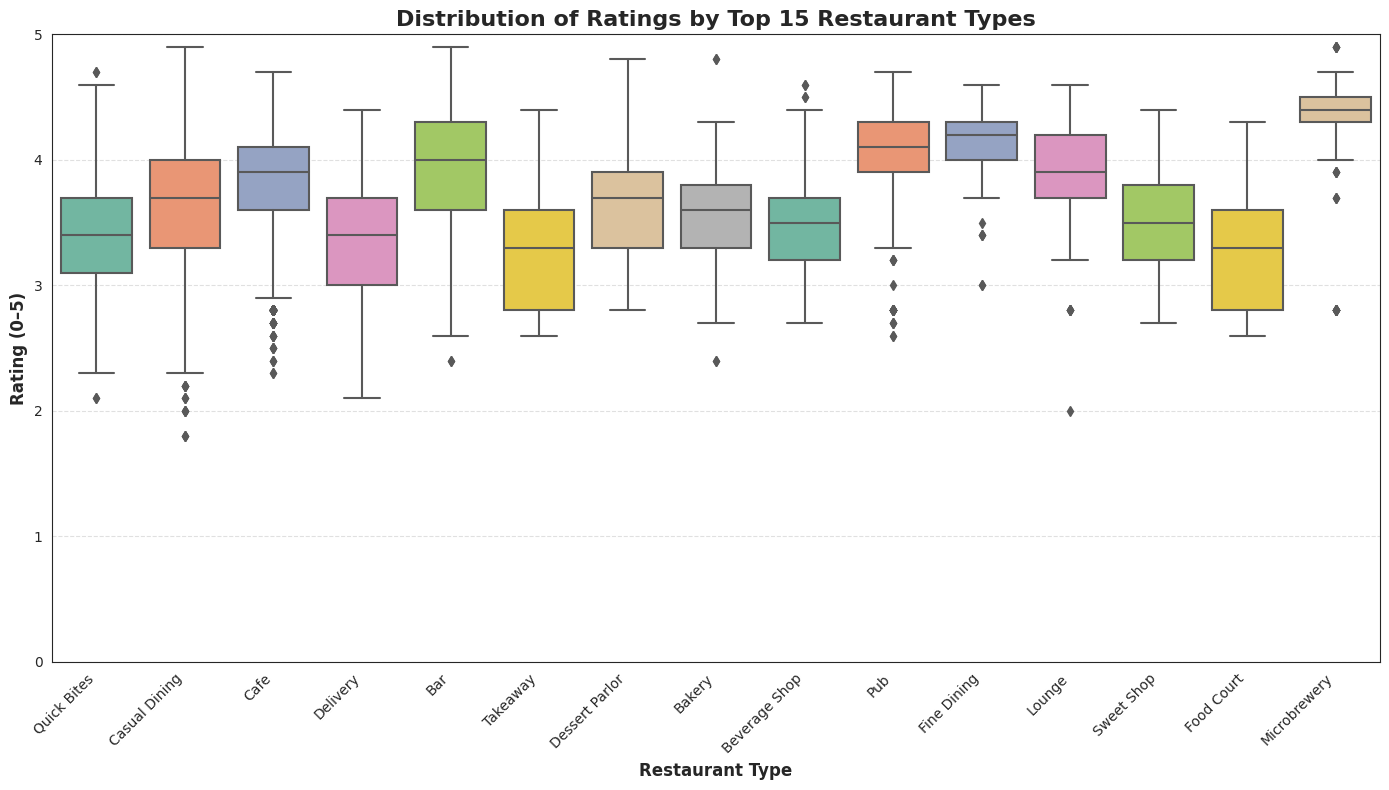

In [351]:
# Boxplot for Top 15 Restaurant Types
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=top15_df,
    x="restaurant_type", y="rate_out_of_5",
    order=top15_types,     # enforce same order as aggregate_restaurant_type
    palette="Set2")

# Formatting
plt.xticks(rotation=45, ha="right")
plt.title("Distribution of Ratings by Top 15 Restaurant Types", fontsize=16, fontweight="bold")
plt.xlabel("Restaurant Type", fontsize=12, fontweight="bold")
plt.ylabel("Rating (0–5)", fontsize=12, fontweight="bold")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.6)

# Caption
# plt.figtext(0.5, -0.05, "Source: Zomato Dataset", ha="center", fontsize=10, style="italic", color="gray")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


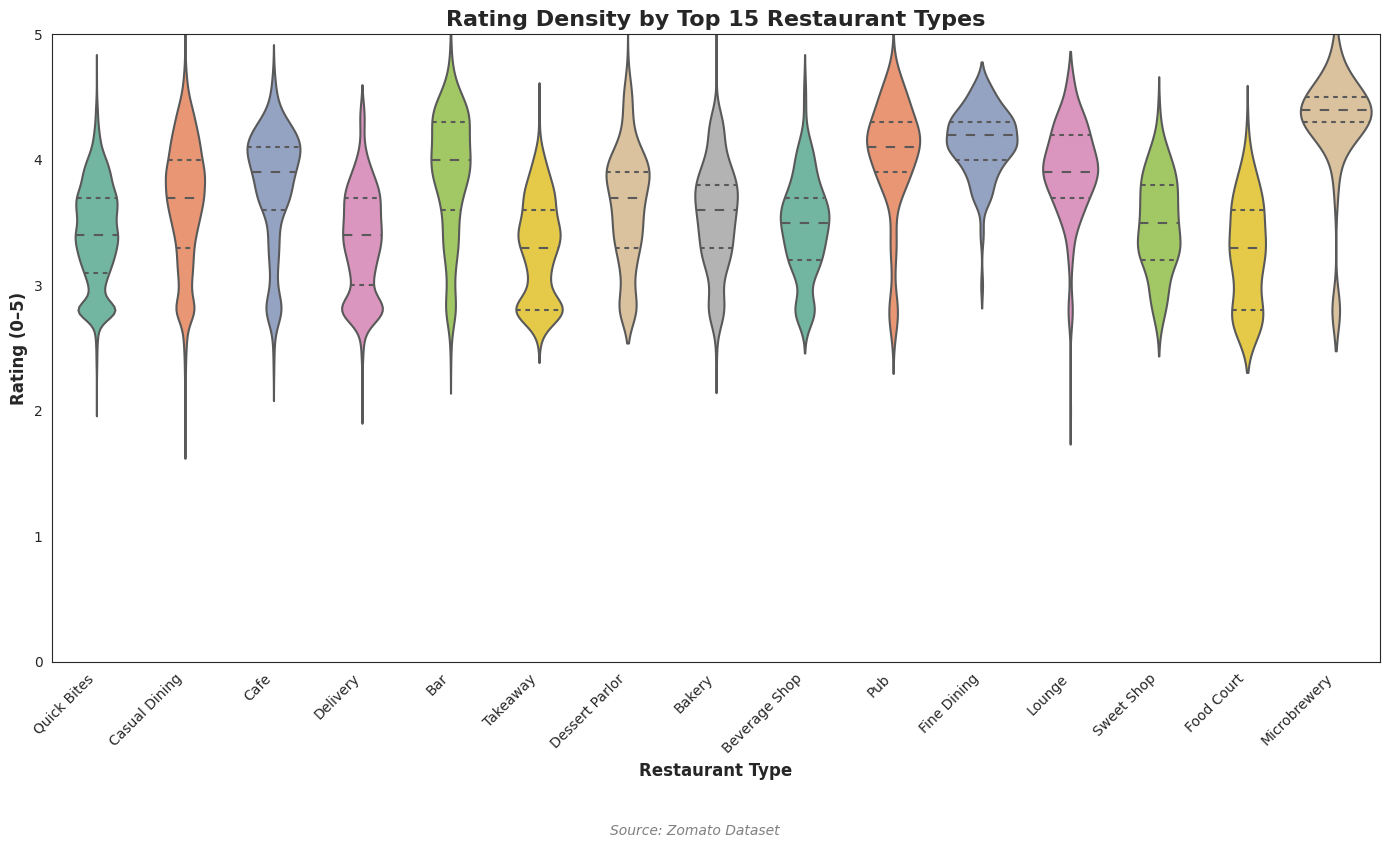

In [352]:
# Violin plot for Top 15 Restaurant Types
plt.figure(figsize=(14, 8))
sns.violinplot(
    data=top15_df,
    x="restaurant_type", y="rate_out_of_5",
    order=top15_types,     # enforce same order as aggregate_restaurant_type
    palette="Set2", inner="quartile") # can change to palette="muted" for different colour

# Formatting
plt.xticks(rotation=45, ha="right")
plt.title("Rating Density by Top 15 Restaurant Types", fontsize=16, fontweight="bold")
plt.xlabel("Restaurant Type", fontsize=12, fontweight="bold")
plt.ylabel("Rating (0–5)", fontsize=12, fontweight="bold")
plt.ylim(0, 5)

# Caption
plt.figtext(0.5, -0.05, "Source: Zomato Dataset", ha="center", fontsize=10, style="italic", color="gray")

plt.tight_layout()
plt.show()

In [353]:
# Insights from Rating Distributions for Top 15
insights = []

# Median ratings
median_ratings = top15_df.groupby("restaurant_type")["rate_out_of_5"].median()

# Highest median rating
highest_median = median_ratings.idxmax()
insights.append(f"⭐ **{highest_median}** has the highest median rating at {median_ratings.max():.1f}.")

# Lowest median rating
lowest_median = median_ratings.idxmin()
insights.append(f"⚠️ **{lowest_median}** has the lowest median rating at {median_ratings.min():.1f}.")

# Rating spread
spread = top15_df.groupby("restaurant_type")["rate_out_of_5"].agg(lambda x: x.max() - x.min())

# Widest spread
widest = spread.idxmax()
insights.append(f"📊 **{widest}** shows the widest rating spread ({spread.max():.1f} points), "
                f"suggesting inconsistent quality.")

# Tightest spread
tightest = spread.idxmin()
insights.append(f"🎯 **{tightest}** has the most consistent ratings (spread {spread.min():.1f}), "
                f"suggesting predictable quality.")

# Display insights
from IPython.display import Markdown, display
display(Markdown("### 📊 Insights from Rating Distributions (Top 15)"))
for i in insights:
    display(Markdown(f"- {i}"))

/tmp/ipykernel_36/3655273209.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_ratings = top15_df.groupby("restaurant_type")["rate_out_of_5"].median()
/tmp/ipykernel_36/3655273209.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  spread = top15_df.groupby("restaurant_type")["rate_out_of_5"].agg(lambda x: x.max() - x.min())


### 📊 Insights from Rating Distributions (Top 15)

- ⭐ **Microbrewery** has the highest median rating at 4.4.

- ⚠️ **Food Court** has the lowest median rating at 3.3.

- 📊 **Casual Dining** shows the widest rating spread (3.1 points), suggesting inconsistent quality.

- 🎯 **Fine Dining** has the most consistent ratings (spread 1.6), suggesting predictable quality.

In [354]:
# Summary stats for Top 15 restaurant types
summary_stats = (
    top15_df.groupby("restaurant_type")["rate_out_of_5"]
    .agg(
        Count="count",
        Mean="mean",
        Median="median",
        Min="min",
        Max="max",
        Spread=lambda x: x.max() - x.min(),
        StdDev="std"
    )
    .round(2)
    .reindex(top15_types)  # enforce the Top 15 order
)

# Display summary stats
from IPython.display import display, Markdown
display(Markdown("### 📋 Summary Statistics of Ratings (Top 15 Restaurant Types)"))
display(summary_stats)

/tmp/ipykernel_36/2561336673.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top15_df.groupby("restaurant_type")["rate_out_of_5"]


### 📋 Summary Statistics of Ratings (Top 15 Restaurant Types)

,Count,Mean,Median,Min,Max,Spread,StdDev
restaurant_type,,,,,,,
Quick Bites,6431,3.41,3.4,2.1,4.7,2.6,0.40
Casual Dining,5729,3.67,3.7,1.8,4.9,3.1,0.50
Cafe,1516,3.80,3.9,2.3,4.7,2.4,0.47
Delivery,1428,3.34,3.4,2.1,4.4,2.3,0.42
Bar,830,3.89,4.0,2.4,4.9,2.5,0.50
Takeaway,693,3.29,3.3,2.6,4.4,1.8,0.40
Dessert Parlor,570,3.64,3.7,2.8,4.8,2.0,0.46
Bakery,420,3.56,3.6,2.4,4.8,2.4,0.43
Beverage Shop,360,3.47,3.5,2.7,4.6,1.9,0.39


#### 🎨 Color Scheme Options for `background_gradient`

##### 🔹 Sequential (light → dark)  
- `"Blues"`, `"Greens"`, `"Oranges"`, `"Purples"`, `"Reds"`  
- `"YlGnBu"`, `"YlOrRd"`, `"BuPu"`, `"GnBu"`, `"PuBu"`, `"OrRd"`  

---

##### 🔹 Diverging (low = one color, high = another)  
- `"RdBu"`, `"RdYlBu"`, `"PiYG"`, `"PuOr"`, `"coolwarm"`, `"BrBG"`  

---

##### 🔹 Perceptually Uniform (color-blind friendly)  
- `"viridis"`, `"plasma"`, `"inferno"`, `"magma"`, `"cividis"`  

---

##### 🔹 Miscellaneous  
- `"cubehelix"`, `"Spectral"`, `"rainbow"`  
  - ⚠️ *Not recommended for serious data analysis (too rainbow-like, hard to interpret).*  

---

💡 To list all available colormaps in the environment:  
```python
import matplotlib.pyplot as plt
print(plt.colormaps())```


In [355]:
# Summary stats for Top 15 restaurant types
summary_stats = (
    top15_df.groupby("restaurant_type")["rate_out_of_5"]
    .agg(
        Count="count",
        Mean="mean",
        Median="median",
        Min="min",
        Max="max",
        Spread=lambda x: x.max() - x.min(),
        StdDev="std"
    )
    .round(2)
    .reindex(top15_types)  # enforce the Top 15 order
)

# Display with gradient coloring
styled_summary = (
    summary_stats.style
    .background_gradient(cmap="YlGnBu", subset=["Mean", "Median", "Spread", "StdDev", 'Min', 'Max'])
    .background_gradient(cmap="YlGnBu", subset=["Count"])
    .set_properties(**{"font-size": "11pt"})
)

from IPython.display import display, Markdown
display(Markdown("### 📋 Summary Statistics of Ratings (Top 15 Restaurant Types)"))
display(styled_summary)

/tmp/ipykernel_36/3701988780.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top15_df.groupby("restaurant_type")["rate_out_of_5"]


### 📋 Summary Statistics of Ratings (Top 15 Restaurant Types)

,Count,Mean,Median,Min,Max,Spread,StdDev
restaurant_type,,,,,,,
Quick Bites,6431,3.410000,3.400000,2.100000,4.700000,2.600000,0.400000
Casual Dining,5729,3.670000,3.700000,1.800000,4.900000,3.100000,0.500000
Cafe,1516,3.800000,3.900000,2.300000,4.700000,2.400000,0.470000
Delivery,1428,3.340000,3.400000,2.100000,4.400000,2.300000,0.420000
Bar,830,3.890000,4.000000,2.400000,4.900000,2.500000,0.500000
Takeaway,693,3.290000,3.300000,2.600000,4.400000,1.800000,0.400000
Dessert Parlor,570,3.640000,3.700000,2.800000,4.800000,2.000000,0.460000
Bakery,420,3.560000,3.600000,2.400000,4.800000,2.400000,0.430000
Beverage Shop,360,3.470000,3.500000,2.700000,4.600000,1.900000,0.390000


In [356]:
insights_summary = []

# Most common type
most_common = summary_stats["Count"].idxmax()
insights_summary.append(
    f"🍽 The most common restaurant type is **{most_common}**, "
    f"with **{summary_stats.loc[most_common, 'Count']} restaurants**."
)

# Highest average rating
highest_mean = summary_stats["Mean"].idxmax()
insights_summary.append(
    f"⭐ **{highest_mean}** has the highest average rating "
    f"({summary_stats.loc[highest_mean, 'Mean']})."
)

# Lowest average rating
lowest_mean = summary_stats["Mean"].idxmin()
insights_summary.append(
    f"⚠️ **{lowest_mean}** has the lowest average rating "
    f"({summary_stats.loc[lowest_mean, 'Mean']})."
)

# Most consistent (lowest StdDev)
most_consistent = summary_stats["StdDev"].idxmin()
insights_summary.append(
    f"🎯 **{most_consistent}** shows the most consistent customer rating "
    f"(lowest variation, StdDev = {summary_stats.loc[most_consistent, 'StdDev']})."
)

# Most inconsistent (highest StdDev)
most_inconsistent = summary_stats["StdDev"].idxmax()
insights_summary.append(
    f"📊 **{most_inconsistent}** shows the most inconsistent ratings "
    f"(highest variation, StdDev = {summary_stats.loc[most_inconsistent, 'StdDev']})."
)

# Display insights
display(Markdown("### 📊 Insights from Summary Statistics (Top 15 Restaurant Types)"))
for i in insights_summary:
    display(Markdown(f"- {i}"))

### 📊 Insights from Summary Statistics (Top 15 Restaurant Types)

- 🍽 The most common restaurant type is **Quick Bites**, with **6431 restaurants**.

- ⭐ **Microbrewery** has the highest average rating (4.28).

- ⚠️ **Food Court** has the lowest average rating (3.26).

- 🎯 **Fine Dining** shows the most consistent customer rating (lowest variation, StdDev = 0.27).

- 📊 **Casual Dining** shows the most inconsistent ratings (highest variation, StdDev = 0.5).

<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background: linear-gradient(135deg, #d6ccc2, #b08968, #7f5539); 
            color: #f1f1f1; text-align: center; 
            width: 98.2%; margin: 20px auto;">
<h2> Average Cost for Two by Top 15 Restaurant Types </h2>
</div>

In [357]:
# Compute average cost by restaurant type
average_cost_by_types = (restaurant_df.groupby("restaurant_type", as_index=False)
    .agg(AvgCost=("avg_cost_two_people", "mean"))
    .round(2))

# Select Top 15 by restaurant count (to align with previous analysis)
top15_types = aggregate_restaurant_type.head(15)["restaurant_type"].tolist()
top15_avg_cost = average_cost_by_types[average_cost_by_types["restaurant_type"].isin(top15_types)]

# Reorder to match Top 15 order
top15_avg_cost = top15_avg_cost.set_index("restaurant_type").loc[top15_types].reset_index()
# Display the result
display(top15_avg_cost)

/tmp/ipykernel_36/2605620008.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_cost_by_types = (restaurant_df.groupby("restaurant_type", as_index=False)


,restaurant_type,AvgCost
0,Quick Bites,321.14
1,Casual Dining,843.15
2,Cafe,663.19
3,Delivery,415.66
4,Bar,1269.94
5,Takeaway,396.83
6,Dessert Parlor,366.73
7,Bakery,411.76
8,Beverage Shop,230.14
9,Pub,1352.53


/tmp/ipykernel_36/214755377.py:35: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation="vertical")


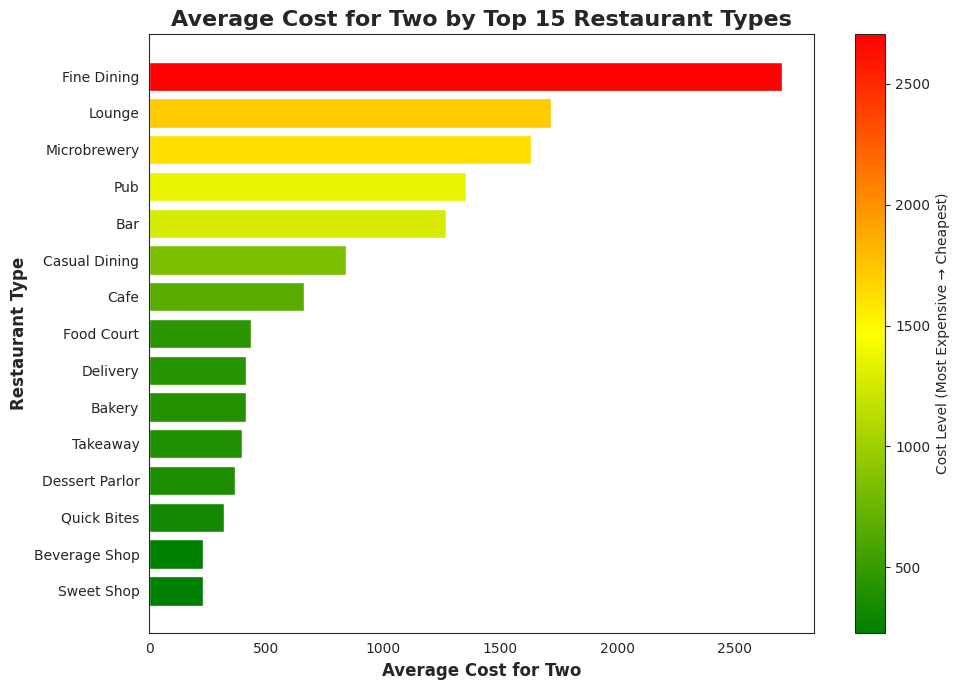

In [358]:
import matplotlib as mpl

# Sort top15 by AvgCost (descending: most expensive first)
top15_avg_cost_sorted = top15_avg_cost.sort_values(by="AvgCost", ascending=False)

# Create custom colormap (green → yellow → red)
cmap = mpl.colors.LinearSegmentedColormap.from_list("cost_cmap", ["green", "yellow", "red"])

# Normalize cost values for color mapping
norm = mpl.colors.Normalize(
    vmin=top15_avg_cost_sorted["AvgCost"].min(),
    vmax=top15_avg_cost_sorted["AvgCost"].max())

# Assign colors based on AvgCost
colors = [cmap(norm(v)) for v in top15_avg_cost_sorted["AvgCost"]]

# Plot horizontal bar chart
plt.figure(figsize=(10, 7))
bars = plt.barh(
    top15_avg_cost_sorted["restaurant_type"],
    top15_avg_cost_sorted["AvgCost"],
    color=colors)

# Invert y-axis → highest cost at top
plt.gca().invert_yaxis()

# Labels and title
plt.xlabel("Average Cost for Two", fontsize=12, fontweight="bold")
plt.ylabel("Restaurant Type", fontsize=12, fontweight="bold")
plt.title("Average Cost for Two by Top 15 Restaurant Types", fontsize=16, fontweight="bold")

# Add colorbar legend
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, orientation="vertical")
cbar.set_label("Cost Level (Most Expensive → Cheapest)", fontsize=10)

# Caption
# plt.figtext(0.5, -0.05, "Source: Zomato Dataset", ha="center", fontsize=10, style="italic", color="gray")

plt.tight_layout()
plt.show()

/tmp/ipykernel_36/3478906245.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(top15_cost_rating["restaurant_type"], rotation=45, ha="right")


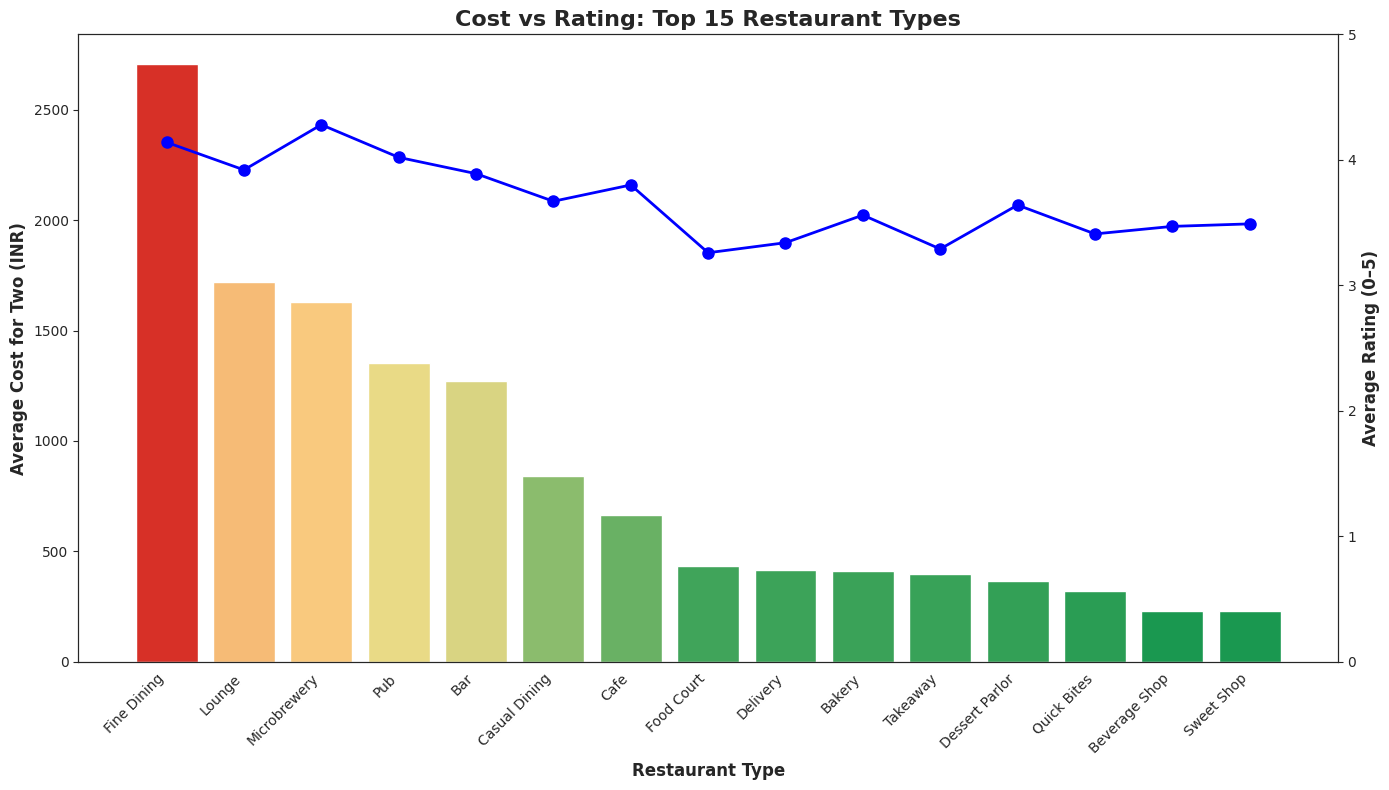

In [359]:
# Merge cost, rating, and number of restaurants for Top 15 types
top15_cost_rating = top15_avg_cost_sorted.merge(
    aggregate_restaurant_type[["restaurant_type", "# of Restaurants", "AvgRating"]],
    on="restaurant_type"
)

# Colormap (green → yellow → red by cost)
cmap = mpl.colors.LinearSegmentedColormap.from_list("cost_cmap", ["#1a9850", "#fee08b", "#d73027"])
norm = mpl.colors.Normalize(
    vmin=top15_cost_rating["AvgCost"].min(),
    vmax=top15_cost_rating["AvgCost"].max()
)
colors = [cmap(norm(v)) for v in top15_cost_rating["AvgCost"]]

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bars = AvgCost
bars = ax1.bar(
    top15_cost_rating["restaurant_type"],
    top15_cost_rating["AvgCost"],
    color=colors,
    label="Average Cost for Two"
)

# Secondary axis = AvgRating (line)
ax2 = ax1.twinx()
ax2.plot(
    top15_cost_rating["restaurant_type"],
    top15_cost_rating["AvgRating"],
    marker="o", markersize=8,
    color="blue", linewidth=2,
    label="Average Rating"
)

# Axis labels
ax1.set_xlabel("Restaurant Type", fontsize=12, fontweight="bold")
ax1.set_ylabel("Average Cost for Two (INR)", fontsize=12, fontweight="bold")
ax2.set_ylabel("Average Rating (0–5)", fontsize=12, fontweight="bold")

# Title
plt.title("Cost vs Rating: Top 15 Restaurant Types", fontsize=16, fontweight="bold")

# Formatting
ax1.set_xticklabels(top15_cost_rating["restaurant_type"], rotation=45, ha="right")
ax2.set_ylim(0, 5)  # ratings scale 0–5

# Add colorbar for cost
#sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
#sm.set_array([])
#cbar = fig.colorbar(sm, ax=ax1, pad=0.02)
#cbar.set_label("Cost Level (Cheapest → Most Expensive)", fontsize=10)

# Caption
# plt.figtext(0.5, -0.05, "Source: Zomato Dataset", ha="center", fontsize=10, style="italic", color="gray")

plt.tight_layout()
plt.show()


In [360]:
# Merge cost, rating, and popularity (Top 15 types only)
top15_cost_rating = top15_avg_cost_sorted.merge(
    aggregate_restaurant_type[["restaurant_type", "# of Restaurants", "AvgRating"]],
    on="restaurant_type"
)

# Add popularity ranking (1 = most restaurants)
top15_cost_rating["PopularityRank"] = (
    top15_cost_rating["# of Restaurants"].rank(ascending=False, method="dense").astype(int)
)

# Identify largest segment (most popular)
largest_segment = top15_cost_rating.loc[
    top15_cost_rating["# of Restaurants"].idxmax()
]

insights_cost_rating = []

# --- Largest segment highlight ---
insights_cost_rating.append(
    f"🌟 The **largest segment** is **{largest_segment['restaurant_type']}** "
    f"with **{largest_segment['# of Restaurants']} restaurants** "
    f"(Popularity Rank #1). It has an average cost of **{largest_segment['AvgCost']:.0f} INR** "
    f"and an average rating of **{largest_segment['AvgRating']:.1f}/5**."
)

# 1. Most expensive vs rating
most_expensive = top15_cost_rating.iloc[0]
insights_cost_rating.append(
    f"💎 **{most_expensive['restaurant_type']}** is the most expensive "
    f"(~{most_expensive['AvgCost']:.0f} INR for two, across {most_expensive['# of Restaurants']} restaurants, "
    f"Popularity Rank #{most_expensive['PopularityRank']}), "
    f"with an average rating of **{most_expensive['AvgRating']:.1f}/5**."
)

# 2. Cheapest vs rating
cheapest = top15_cost_rating.iloc[-1]
insights_cost_rating.append(
    f"💵 **{cheapest['restaurant_type']}** is the cheapest "
    f"(~{cheapest['AvgCost']:.0f} INR for two, across {cheapest['# of Restaurants']} restaurants, "
    f"Popularity Rank #{cheapest['PopularityRank']}), "
    f"with an average rating of **{cheapest['AvgRating']:.1f}/5**."
)

# 3. Mid-range segment (500–1000 INR) with rating comment
mid_range = top15_cost_rating[
    (top15_cost_rating["AvgCost"] >= 500) &
    (top15_cost_rating["AvgCost"] <= 1000)
]
if not mid_range.empty:
    for _, row in mid_range.iterrows():
        insights_cost_rating.append(
            f"📊 The **mid-range segment (500–1000 INR)** includes **{row['restaurant_type']}** "
            f"(Popularity Rank #{row['PopularityRank']}, {row['# of Restaurants']} restaurants), "
            f"with an average rating of **{row['AvgRating']:.1f}/5** — "
            f"indicating a balance between affordability and perceived quality."
        )

# 4. High cost but low rating (underperformers)
low_value = top15_cost_rating[
    (top15_cost_rating["AvgCost"] > top15_cost_rating["AvgCost"].median()) &
    (top15_cost_rating["AvgRating"] < top15_cost_rating["AvgRating"].median())
]
if not low_value.empty:
    low_value_types = ", ".join(
        f"{row['restaurant_type']} (Popularity Rank #{row['PopularityRank']}, "
        f"{row['# of Restaurants']} restaurants, AvgRating {row['AvgRating']:.1f}/5)"
        for _, row in low_value.iterrows()
    )
    insights_cost_rating.append(
        f"⚠️ Some **high-cost categories underperform on ratings**: {low_value_types}. "
        f"Despite charging more, these categories score **below-average in customer satisfaction**, "
        f"raising concerns about **value-for-money**."
    )

# 5. Low cost but high rating (value champions)
high_value = top15_cost_rating[
    (top15_cost_rating["AvgCost"] < top15_cost_rating["AvgCost"].median()) &
    (top15_cost_rating["AvgRating"] > top15_cost_rating["AvgRating"].median())
]
if not high_value.empty:
    high_value_types = ", ".join(
        f"{row['restaurant_type']} (Popularity Rank #{row['PopularityRank']}, "
        f"{row['# of Restaurants']} restaurants, AvgRating {row['AvgRating']:.1f}/5)"
        for _, row in high_value.iterrows()
    )
    insights_cost_rating.append(
        f"✅ Some **affordable categories deliver strong ratings**: {high_value_types}. "
        f"These stand out as **value-for-money leaders**, combining low cost with **above-average satisfaction**."
    )

# 6. Overall variation
variation_cost = most_expensive["AvgCost"] - cheapest["AvgCost"]
variation_rating = most_expensive["AvgRating"] - cheapest["AvgRating"]
insights_cost_rating.append(
    f"📉 The price gap between the most expensive and cheapest types is **{variation_cost:.0f} INR**, "
    f"while the rating gap is only **{variation_rating:.1f} points**. "
    f"This suggests **price does not strongly determine quality perception**, "
    f"even across {top15_cost_rating['# of Restaurants'].sum()} restaurants."
)

# --- Display Insights ---
display(Markdown("### 📊 Insights: Cost vs Ratings with Popularity Context (Top 15 Restaurant Types)"))
for insight in insights_cost_rating:
    display(Markdown(f"- {insight}"))

### 📊 Insights: Cost vs Ratings with Popularity Context (Top 15 Restaurant Types)

- 🌟 The **largest segment** is **Quick Bites** with **6431 restaurants** (Popularity Rank #1). It has an average cost of **321 INR** and an average rating of **3.4/5**.

- 💎 **Fine Dining** is the most expensive (~2705 INR for two, across 235 restaurants, Popularity Rank #11), with an average rating of **4.1/5**.

- 💵 **Sweet Shop** is the cheapest (~230 INR for two, across 191 restaurants, Popularity Rank #13), with an average rating of **3.5/5**.

- 📊 The **mid-range segment (500–1000 INR)** includes **Casual Dining** (Popularity Rank #2, 5729 restaurants), with an average rating of **3.7/5** — indicating a balance between affordability and perceived quality.

- 📊 The **mid-range segment (500–1000 INR)** includes **Cafe** (Popularity Rank #3, 1516 restaurants), with an average rating of **3.8/5** — indicating a balance between affordability and perceived quality.

- 📉 The price gap between the most expensive and cheapest types is **2476 INR**, while the rating gap is only **0.6 points**. This suggests **price does not strongly determine quality perception**, even across 19248 restaurants.

<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background: linear-gradient(135deg, #d6ccc2, #b08968, #7f5539); 
            color: #f1f1f1; text-align: center; 
            width: 98.2%; margin: 20px auto;">
<h2> Top 15 Cuisine Type: Popularity vs Cost</h2>
</div>

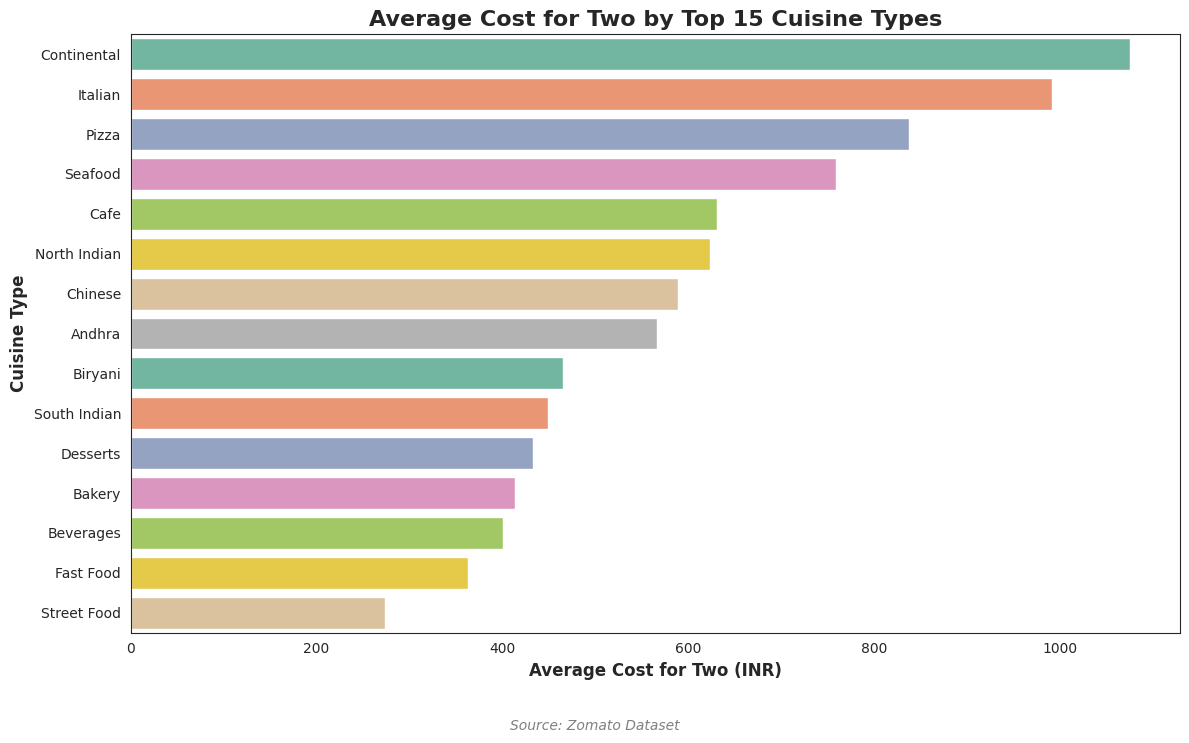

In [361]:
# Aggregate average cost per cuisine type
cuisine_cost = (
    restaurant_df.groupby("cuisines_type", as_index=False)
    .agg(
        AvgCost=("avg_cost_two_people", "mean"),
        Count=("cuisines_type", "size"))
    .round(2)
    .sort_values(by="AvgCost", ascending=False))

# Focus on Top 15 cuisines by restaurant count (popularity)
top15_cuisines = cuisine_cost.sort_values(by="Count", ascending=False).head(15)

# Plot
plt.figure(figsize=(12, 7))
sns.barplot(
    data=top15_cuisines.sort_values(by="AvgCost", ascending=False), 
    x="AvgCost", 
    y="cuisines_type", 
    palette="Set2"
)

# Labels & Title
plt.xlabel("Average Cost for Two (INR)", fontsize=12, fontweight="bold")
plt.ylabel("Cuisine Type", fontsize=12, fontweight="bold")
plt.title("Average Cost for Two by Top 15 Cuisine Types", fontsize=16, fontweight="bold")

# Caption
plt.figtext(0.5, -0.05, "Source: Zomato Dataset", ha="center", fontsize=10, style="italic", color="gray")

plt.tight_layout()
plt.show()

<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background: linear-gradient(135deg, #d6ccc2, #b08968, #7f5539); 
            color: #f1f1f1; text-align: center; 
            width: 98.2%; margin: 20px auto;">
<h2> Popularity of Cuisine Types across Restaurant Type</h2>
</div>

/tmp/ipykernel_36/235905448.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  restaurant_df.groupby(["restaurant_type", "cuisines_type"])


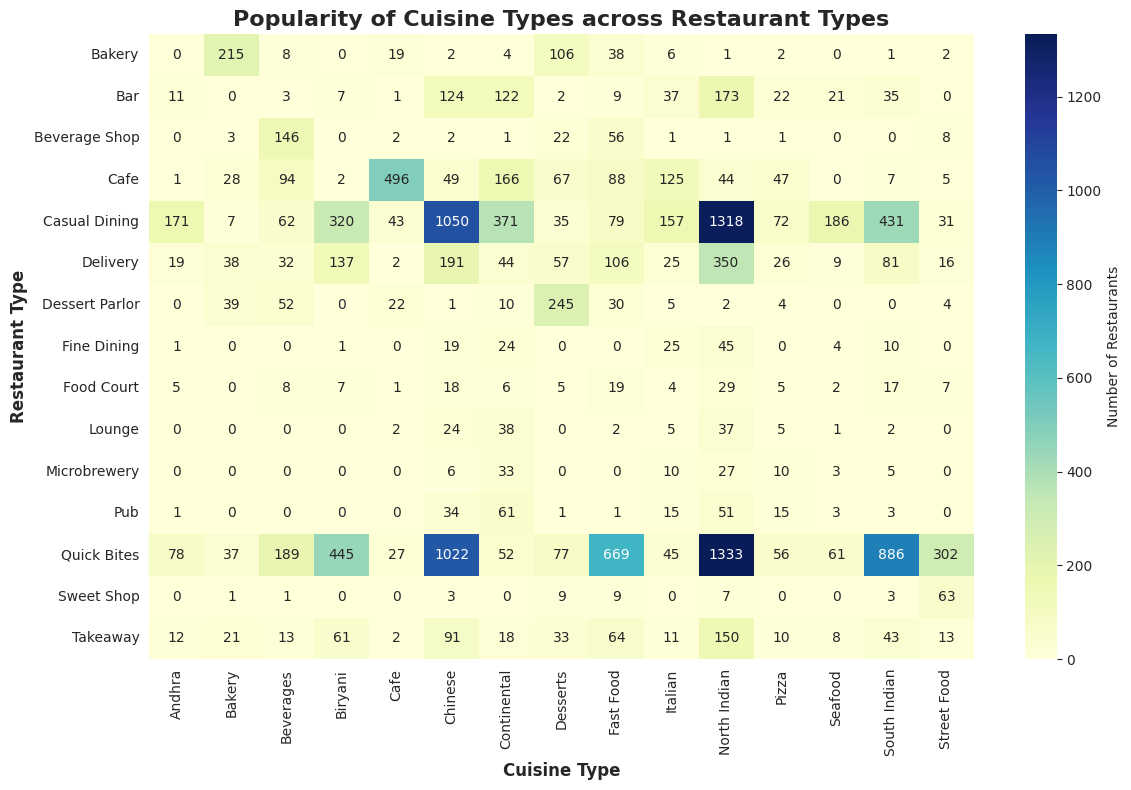

In [362]:
# Cross-tab: Count of restaurants by [restaurant_type, cuisines_type]
type_cuisine_counts = (
    restaurant_df.groupby(["restaurant_type", "cuisines_type"])
    .size()
    .reset_index(name="Count")
)

# Get Top 10 restaurant types and Top 15 cuisines (for focus)
top_types = restaurant_df["restaurant_type"].value_counts().head(15).index
top_cuisines = restaurant_df["cuisines_type"].value_counts().head(15).index

filtered_counts = type_cuisine_counts[
    type_cuisine_counts["cuisines_type"].isin(top_cuisines) &
    type_cuisine_counts["restaurant_type"].isin(top_types)]

# Pivot for heatmap
pivot_table = filtered_counts.pivot(
    index="restaurant_type", 
    columns="cuisines_type", 
    values="Count"
).fillna(0)

# Plot Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    pivot_table,
    annot=True, fmt=".0f", cmap="YlGnBu",
    cbar_kws={'label': 'Number of Restaurants'})

plt.title("Popularity of Cuisine Types across Restaurant Types", fontsize=16, fontweight="bold")
plt.xlabel("Cuisine Type", fontsize=12, fontweight="bold")
plt.ylabel("Restaurant Type", fontsize=12, fontweight="bold")

plt.tight_layout()
plt.show()

In [363]:
# --- Get top 3 cuisines for each restaurant type ---
top3_cuisines_per_type = (
    type_cuisine_counts
    .sort_values(["restaurant_type", "Count"], ascending=[True, False])
    .groupby("restaurant_type")
    .head(3)   # top 3 per restaurant type
)

# --- Generate insights ---
insights_type_cuisine = []
for rtype in top3_cuisines_per_type["restaurant_type"].unique():
    subset = top3_cuisines_per_type[top3_cuisines_per_type["restaurant_type"] == rtype]
    cuisines_list = ", ".join(
        f"{row['cuisines_type']} ({row['Count']})" for _, row in subset.iterrows()
    )
    insights_type_cuisine.append(
        f"🍽 **{rtype}** is most commonly associated with: {cuisines_list}."
    )

# --- Display ---
display(Markdown("### 📊 Insights: Top 3 Cuisines by Restaurant Type"))
for insight in insights_type_cuisine:
    display(Markdown(f"- {insight}"))

/tmp/ipykernel_36/3761625777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("restaurant_type")


### 📊 Insights: Top 3 Cuisines by Restaurant Type

- 🍽 **Bakery** is most commonly associated with: Bakery (215), Desserts (106), Fast Food (38).

- 🍽 **Bar** is most commonly associated with: North Indian (173), Chinese (124), Continental (122).

- 🍽 **Beverage Shop** is most commonly associated with: Beverages (146), Juices (59), Fast Food (56).

- 🍽 **Bhojanalya** is most commonly associated with: South Indian (1), Afghan (0), Afghani (0).

- 🍽 **Cafe** is most commonly associated with: Cafe (496), Continental (166), Italian (125).

- 🍽 **Casual Dining** is most commonly associated with: North Indian (1318), Chinese (1050), South Indian (431).

- 🍽 **Club** is most commonly associated with: Continental (3), Chinese (2), Finger Food (2).

- 🍽 **Confectionery** is most commonly associated with: Desserts (2), Afghan (0), Afghani (0).

- 🍽 **Delivery** is most commonly associated with: North Indian (350), Chinese (191), Biryani (137).

- 🍽 **Dessert Parlor** is most commonly associated with: Desserts (245), Ice Cream (121), Beverages (52).

- 🍽 **Dhaba** is most commonly associated with: North Indian (7), Chinese (2), Beverages (1).

- 🍽 **Fine Dining** is most commonly associated with: North Indian (45), Italian (25), Continental (24).

- 🍽 **Food Court** is most commonly associated with: North Indian (29), Fast Food (19), Chinese (18).

- 🍽 **Food Truck** is most commonly associated with: Fast Food (6), Chinese (5), American (3).

- 🍽 **Irani Cafee** is most commonly associated with: North Indian (1), Parsi (1), Afghan (0).

- 🍽 **Kiosk** is most commonly associated with: Fast Food (14), Chinese (6), Rolls (6).

- 🍽 **Lounge** is most commonly associated with: Continental (38), North Indian (37), Finger Food (28).

- 🍽 **Meat Shop** is most commonly associated with: Fast Food (1), Raw Meats (1), Afghan (0).

- 🍽 **Mess** is most commonly associated with: South Indian (24), Andhra (17), North Indian (11).

- 🍽 **Microbrewery** is most commonly associated with: Continental (33), North Indian (27), Finger Food (14).

- 🍽 **Pub** is most commonly associated with: Continental (61), North Indian (51), Chinese (34).

- 🍽 **Quick Bites** is most commonly associated with: North Indian (1333), Chinese (1022), South Indian (886).

- 🍽 **Sweet Shop** is most commonly associated with: Mithai (91), Street Food (63), Desserts (9).

- 🍽 **Takeaway** is most commonly associated with: North Indian (150), Chinese (91), Fast Food (64).

<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background: linear-gradient(135deg, #d6ccc2, #b08968, #7f5539); 
            color: #f1f1f1; text-align: center; 
            width: 98.2%; margin: 20px auto;">
<h2> Average Rating by Online Order/Table Booking</h2>
</div>

In [364]:
# Average rating grouped by Online Order
avg_rating_online = (
    restaurant_df.groupby("online_order")["rate_out_of_5"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"rate_out_of_5": "AvgRating"})
)

display(Markdown("### Average Rating by Online Order"))
display(avg_rating_online)

/tmp/ipykernel_36/3709535305.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  restaurant_df.groupby("online_order")["rate_out_of_5"]


### Average Rating by Online Order

,online_order,AvgRating
0,No,3.53
1,Yes,3.60


In [365]:
# Average rating grouped by Table Booking
avg_rating_booking = (
    restaurant_df.groupby("table_booking")["rate_out_of_5"]
    .mean()
    .round(2)
    .reset_index()
    .rename(columns={"rate_out_of_5": "AvgRating"})
)

display(Markdown("### Average Rating by Table Booking"))
display(avg_rating_booking)

/tmp/ipykernel_36/2108962347.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  restaurant_df.groupby("table_booking")["rate_out_of_5"]


### Average Rating by Table Booking

,table_booking,AvgRating
0,No,3.47
1,Yes,4.07


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


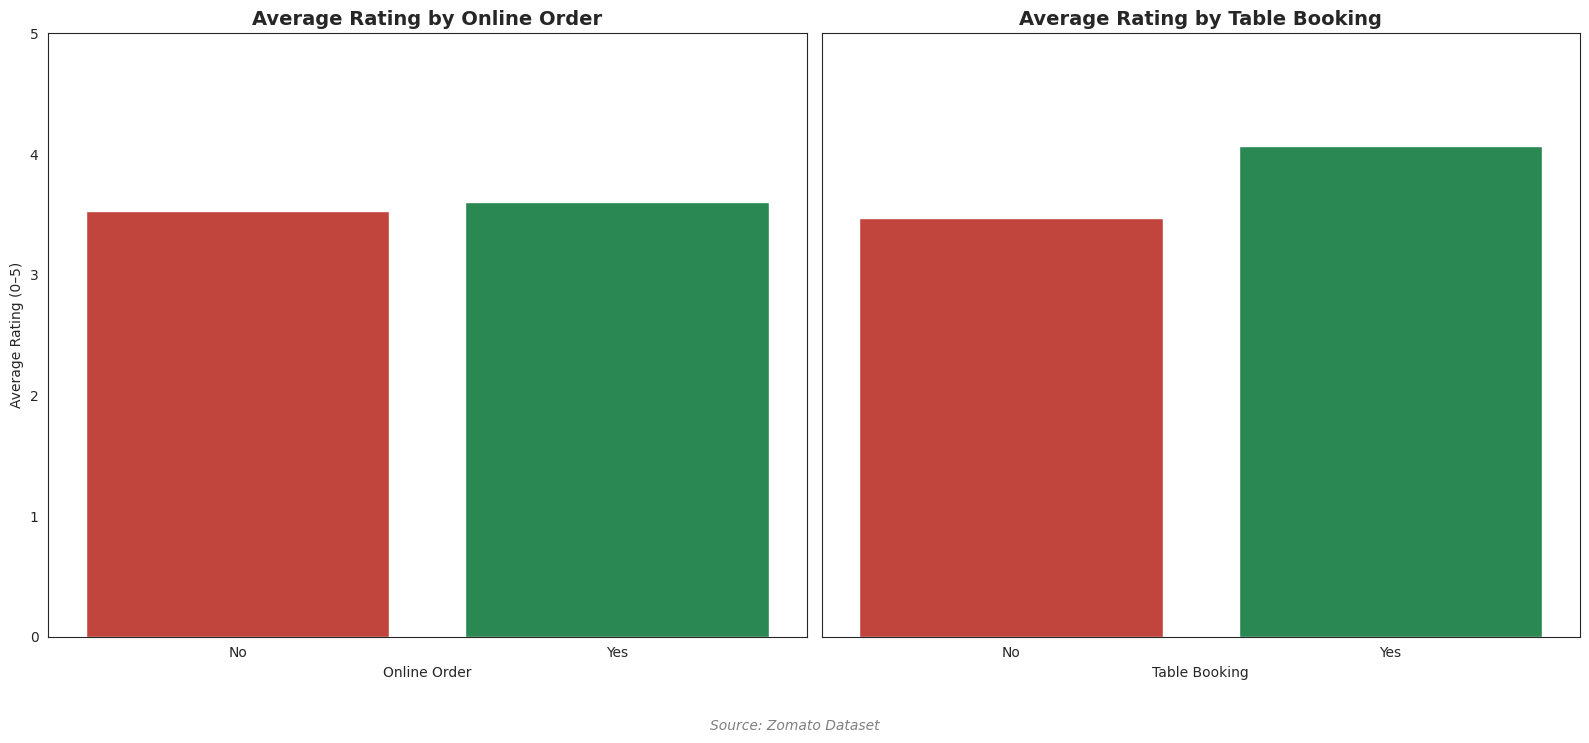

In [366]:
# Create a figure with 1 row and 2 columns of subplots, sharing the y-axis
fig, axes = plt.subplots(1, 2, figsize=(16, 7), sharey=True)

# Online Order
# Plot a bar chart showing the average rating for restaurants with/without online orders
sns.barplot(
    data=avg_rating_online,            # dataset containing online_order and AvgRating
    x="online_order", y="AvgRating",   # x-axis: online order (Yes/No), y-axis: average rating
    palette=["#d73027", "#1a9850"],    # custom color palette (red for No, green for Yes)
    ax=axes[0]                         # plot on the first subplot (left)
)
axes[0].set_title("Average Rating by Online Order", fontsize=14, fontweight="bold")  # set subplot title
axes[0].set_xlabel("Online Order")       # x-axis label
axes[0].set_ylabel("Average Rating (0–5)") # y-axis label
axes[0].set_ylim(0, 5)                   # fix y-axis scale from 0 to 5 (rating scale)

# Table Booking
# Plot a bar chart showing the average rating for restaurants with/without table booking
sns.barplot(
    data=avg_rating_booking,            # dataset containing table_booking and AvgRating
    x="table_booking", y="AvgRating",   # x-axis: table booking (Yes/No), y-axis: average rating
    palette=["#d73027", "#1a9850"],     # same color palette (red for No, green for Yes)
    ax=axes[1]                          # plot on the second subplot (right)
)
axes[1].set_title("Average Rating by Table Booking", fontsize=14, fontweight="bold")  # set subplot title
axes[1].set_xlabel("Table Booking")     # x-axis label
axes[1].set_ylabel("")                  # no y-axis label (shared with first subplot)

# Add a caption under the charts (data source)
plt.figtext(
    0.5, -0.05,                         # position: centered horizontally, slightly below figure
    "Source: Zomato Dataset",           # caption text
    ha="center", fontsize=10,           # horizontal alignment and font style
    style="italic", color="gray"        # styling (italic, gray color)
)

# Adjust layout so elements fit nicely without overlapping
plt.tight_layout()

# Render and display the plots
plt.show()

<div style="border: 2px solid #7c2d12; padding: 15px; border-radius: 10px; 
            background: linear-gradient(135deg, #d6ccc2, #b08968, #7f5539); 
            color: #f1f1f1; text-align: center; 
            width: 98.2%; margin: 20px auto;">
<h2> Impact of Online Order/Table Booking on Rating</h2>
</div>

In [367]:
# Get Top 15 restaurant types by count
top15_types = restaurant_df["restaurant_type"].value_counts().head(15).index

top15_df = restaurant_df[restaurant_df["restaurant_type"].isin(top15_types)].copy()

In [368]:
# Online Orders (Top 15 only)
rating_diff_online = (
    top15_df.groupby(["restaurant_type", "online_order"])["rate_out_of_5"]
    .mean()
    .unstack()
    .reset_index()
    .rename(columns={"Yes": "Rating_Yes", "No": "Rating_No"})
)

# Drop rows with missing values (e.g., types that only have Yes or No)
rating_diff_online = rating_diff_online.dropna()

# Compute difference
rating_diff_online["Rating_Diff"] = (
    rating_diff_online["Rating_Yes"] - rating_diff_online["Rating_No"]
)


# Table Booking (Top 15 only)
rating_diff_booking = (
    top15_df.groupby(["restaurant_type", "table_booking"])["rate_out_of_5"]
    .mean()
    .unstack()
    .reset_index()
    .rename(columns={"Yes": "Rating_Yes", "No": "Rating_No"})
)

rating_diff_booking = rating_diff_booking.dropna()

rating_diff_booking["Rating_Diff"] = (
    rating_diff_booking["Rating_Yes"] - rating_diff_booking["Rating_No"]
)


# Display results
display(Markdown("### Rating Difference (Online Orders, Top 15 types only)"))
display(rating_diff_online.sort_values("Rating_Diff", ascending=False))

display(Markdown("### Rating Difference (Table Booking, Top 15 types only"))
display(rating_diff_booking.sort_values("Rating_Diff", ascending=False))

/tmp/ipykernel_36/96977581.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top15_df.groupby(["restaurant_type", "online_order"])["rate_out_of_5"]
/tmp/ipykernel_36/96977581.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top15_df.groupby(["restaurant_type", "table_booking"])["rate_out_of_5"]


### Rating Difference (Online Orders, Top 15 types only)

online_order,restaurant_type,Rating_No,Rating_Yes,Rating_Diff
16,Lounge,3.875723,4.200000,0.324277
1,Bar,3.816696,4.036015,0.219319
4,Cafe,3.676585,3.878579,0.201994
9,Dessert Parlor,3.553968,3.723232,0.169264
12,Food Court,3.191429,3.358228,0.166799
2,Beverage Shop,3.361304,3.523132,0.161828
21,Quick Bites,3.324070,3.484969,0.160899
19,Microbrewery,4.228829,4.372222,0.143393
22,Sweet Shop,3.440952,3.560465,0.119513
5,Casual Dining,3.614807,3.704510,0.089703


### Rating Difference (Table Booking, Top 15 types only

table_booking,restaurant_type,Rating_No,Rating_Yes,Rating_Diff
23,Takeaway,3.289913,4.100000,0.810087
8,Delivery,3.341421,4.100000,0.758579
9,Dessert Parlor,3.627967,4.363636,0.735670
0,Bakery,3.533038,4.161111,0.628074
1,Bar,3.563128,4.130297,0.567168
5,Casual Dining,3.518875,4.015307,0.496432
21,Quick Bites,3.412310,3.844737,0.432427
20,Pub,3.723333,4.148058,0.424725
11,Fine Dining,3.816129,4.191176,0.375047
4,Cafe,3.727138,4.078333,0.351195


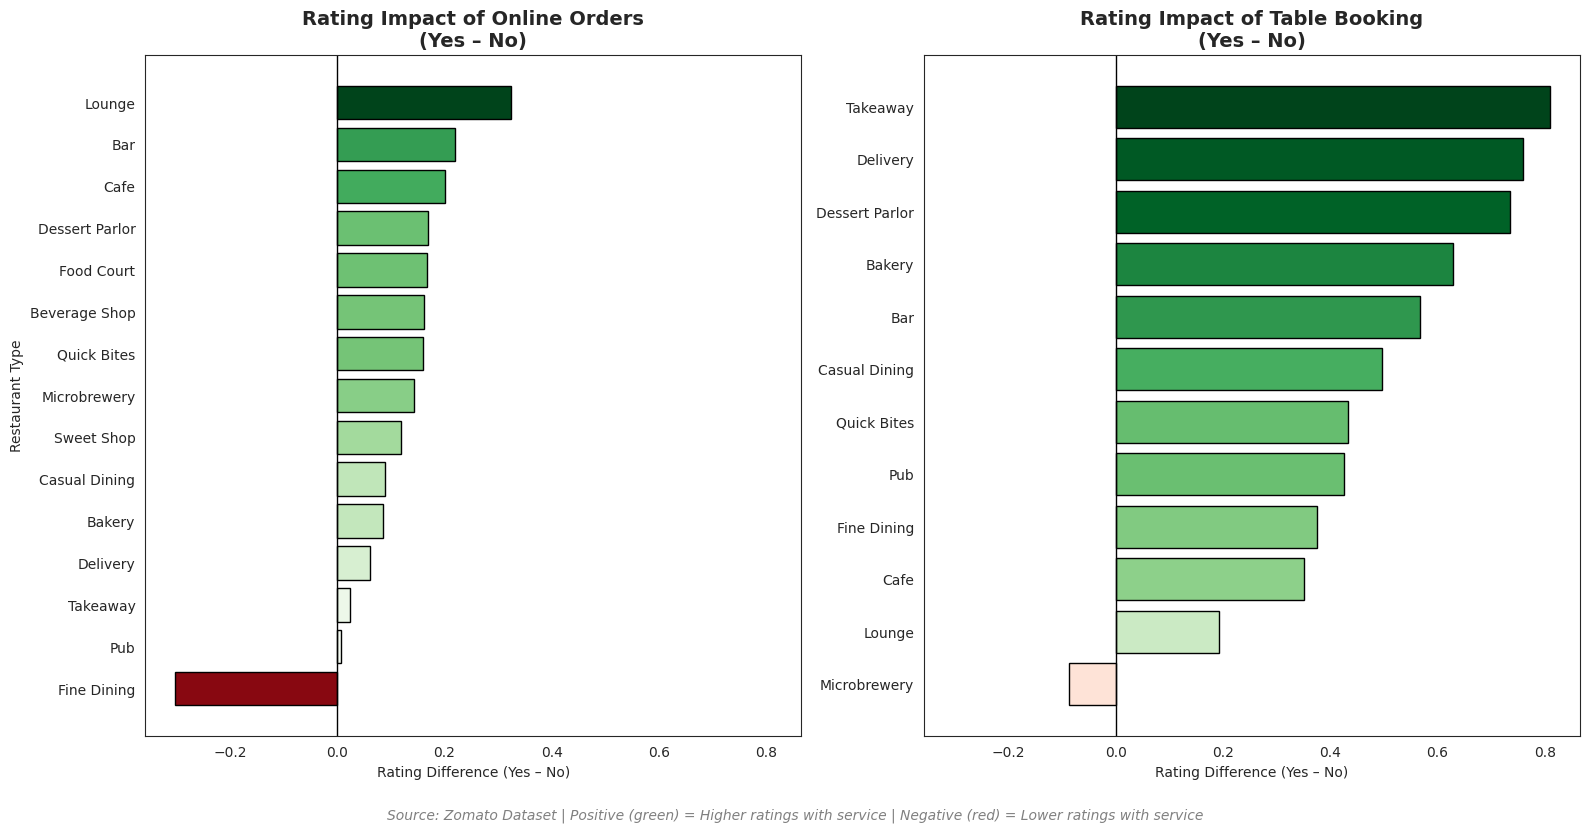

In [369]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

# ✅ Color function: green for +, red for - (scaled by absolute max value)
def get_colors(values):
    vmax = max(abs(values))  # normalize to largest absolute diff
    cmap_pos = plt.cm.Greens
    cmap_neg = plt.cm.Reds
    return [
        cmap_pos(abs(v) / vmax) if v > 0 else cmap_neg(abs(v) / vmax)
        for v in values
    ]

# --- Online Orders Impact (Top 15 only) ---
rating_diff_online_sorted = rating_diff_online.sort_values("Rating_Diff", ascending=True)
colors_online = get_colors(rating_diff_online_sorted["Rating_Diff"])

axes[0].barh(
    rating_diff_online_sorted["restaurant_type"],
    rating_diff_online_sorted["Rating_Diff"],
    color=colors_online, edgecolor="black"
)
axes[0].axvline(0, color="black", linewidth=1)
axes[0].set_title("Rating Impact of Online Orders\n(Yes – No)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Rating Difference (Yes – No)")
axes[0].set_ylabel("Restaurant Type")

# --- Table Booking Impact (Top 15 only) ---
rating_diff_booking_sorted = rating_diff_booking.sort_values("Rating_Diff", ascending=True)
colors_booking = get_colors(rating_diff_booking_sorted["Rating_Diff"])

axes[1].barh(
    rating_diff_booking_sorted["restaurant_type"],
    rating_diff_booking_sorted["Rating_Diff"],
    color=colors_booking, edgecolor="black"
)
axes[1].axvline(0, color="black", linewidth=1)
axes[1].set_title("Rating Impact of Table Booking\n(Yes – No)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Rating Difference (Yes – No)")
axes[1].set_ylabel("")

# ✅ Caption
plt.figtext(
    0.5, -0.03,
    "Source: Zomato Dataset | Positive (green) = Higher ratings with service | Negative (red) = Lower ratings with service",
    ha="center", fontsize=10, style="italic", color="gray"
)

plt.tight_layout()
plt.show()
